<div>
              <img src="AAPLSUP.png" style="width: 250px;"/> 
</div>

# Cointegration and Causality:
# Statistical Analysis of Apple’s Supply Chain
##  CMPS 6790 Final 

By Oliver Orejola

A link to this project can be found [here](https://oliverorejolacmps6790.github.io.).

## Introduction

&nbsp;&nbsp;&nbsp;&nbsp; Apple's iPhone relies on components supplied by a diverse array of companies, including Qualcomm, which provides 5G modems for Apple's iPhones, and Intel, a major supplier of microprocessors (CPUs) for certain Apple devices. Given this extensive supply chain involvement, a natural expectation arises regarding the potential statistical relationships between Apple's stock price and those of the companies within its product supply chain. However, establishing and understanding such financial relationships poses challenges. Many machine learning models and algorithms used for predicting stock and commodity prices rely on correlations between variables, often employing methods like linear regression. Yet, relying solely on correlation can be perilous, as Yule's 1926 study highlighted. Particularly in the case of non-stationary time-series distributions, estimating the correlation coefficient can often lead to [spurious](https://en.wikipedia.org/wiki/Spurious_relationship) relationships (read more about spurious correlation for non-stationary processes [here](https://www.jstor.org/stable/2246135)). Namely, with high-probability, the magnitude of the estimated correlation coeffieicnt of two independent non-stationary stochastic processes  is close to 1. To clairfy, we say a processes, $X(t)$, is stationary (wide sense stationary) if it's mean variance does not change over time. Namely, for each $\Delta \in \mathbb{R}$,
$$ \{X(t+\Delta)\}_{t\in\mathbb{R}} \stackrel{d}= \{X(t)\}_{t\in\mathbb{R}}$$
where the above equality holds in finite dimenisonal distribution. Processes that do not satisfy the above property are refered to as non-staitonary. So, for two independent non-stationary processes $X(t)$ and $Y(t)$, their empirical correlation $|\widehat{Cov}(X(t),Y(t))| \approx 1$ with high-probability. (More information about this claim can be found [here](https://www.jstor.org/stable/26362883))<br>
&nbsp;&nbsp;&nbsp;&nbsp;In light of this, [Robert Engle and Clive Granger (1987)](https://www.jstor.org/stable/1913236) introduced the concept of [cointegration](https://en.wikipedia.org/wiki/Cointegration). Loosely speaking, we say two non-stationary stochastic processes are cointegrated if there exists a linear combination of them which is stationary. Specifically, let $X(t)$ and $Y(t)$ be two non-stationary processes. We say $X(t)$ and $Y(t)$ are cointegrated if there exists constants $\alpha$ and $\beta$ such that the process $\{Z(t)\}_{t\in\mathbb{R}}$, defined as

$$Z(t) := \alpha X(t) + \beta Y(t) $$
is stationary.<br>
&nbsp;&nbsp;&nbsp;&nbsp; Outside of the theoritical shortcomings of the correlation, cointegration provides an intuitive model for the relationship between two non-stationary processes. This is structure is often taken advantage of in finance in the form of a trading scheme known as [trading pairs](https://en.wikipedia.org/wiki/Pairs_trade). A strategy which is based on the mean reversion pricnciple of the stationary process $Z(t)$, where $X(t)$ and $Y(t)$ may be two asset prices. The cointegraiton structure is additionally suggestive of a form of causal structure. Cointegration is often used in conjunction with [Grainger Causality](https://en.wikipedia.org/wiki/Granger_causality) tests. When variables are cointegrated, Granger causality tests can provide insights into the direction of causality between them. Here a "causal effect" means that $X(t)$ has predictive power for $Y(t)$. Inparticular, an [autoregrssive](https://en.wikipedia.org/wiki/Autoregressive_model) (AR) model for $Y(t)$ which includes $X(t)$ lag terms is more predictive than an AR without $X(t)$ lag terms.


&nbsp;&nbsp;&nbsp;&nbsp; In this project we studying conintegration and Grainger causality among Apple (AAPL) stock and 
[8  major American companies tied to the Apple supply chain](https://www.investopedia.com/articles/investing/090315/10-major-companies-tied-apple-supply-chain.asp#:~:text=One%20of%20the%20largest%20suppliers,popular%20products%2C%20including%20the%20iPhone.).
* 3M (MMM) 
* Broadcom (AVGO) 
* Qualcomm (QCOM) 
* Intel (INTC) 
* Jabil Curcits (JBL)
* On (ON) 
* Micron (MU) 
* Texas Instruments (TXN) 

We demonstrate that for certain time intervals statistically signficant cointegration occurs. In addition, we show that there is indeed Grainger causality.

**n.b.** The abbreviation in parenthesis is refered to as a ticker. The ticker is a short hand name for the company on a stock exchange. All companies listed are traded on the New York Stock Exchange.

## Project Data Set

For this project we will be loading in historical stock market data for each of the companies listed above. Our data consists of historical stock market data from 1/1/2018 to 10/31/2023. The data is taken using the  [yahoo finanace api](https://pypi.org/project/yfinance/). For simplicity in our investigation of conintegraiton and causality, we will only look at the value of the stock based on opening price for each day.

## Extract, Load, and Transform

### Extract

We first create a folder for us to store the data which we will save from the yahoo finance api. Then, we install the yfinance module.

In [1]:
#! mkdir Data
# Install yahoo finance api
#! pip install yfinance 

In [2]:
# Import Relevant Libraries
import pandas as pd
from datetime import datetime as dt
import yfinance as yf 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create list of company tickers (reference id on stock exchange) 
tickers = ['AAPL', 'MMM','AVGO','QCOM','INTC','JBL','ON','MU','TXN']

In [4]:
start_date = dt(2018, 1, 1) 
end_date = dt(2023, 11, 1) 

# Create folder to store Data
! mkdir Data
# Sort through list of of companies of interest 
for ticker in tickers:
    
    # Download data through yfinance api
    data = yf.download(ticker, start = start_date,end = end_date) 
    data.reset_index(inplace=True)
    
    path = 'Data/'
    file_name = ticker+'.csv'
    
    # Save data as .csv
    data.to_csv(path+file_name, index=False)
    print(f'({ticker}) Historical Data Downloaded')

mkdir: Data: File exists
[*********************100%%**********************]  1 of 1 completed
(AAPL) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(MMM) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(AVGO) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(QCOM) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(INTC) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(JBL) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(ON) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(MU) Historical Data Downloaded
[*********************100%%**********************]  1 of 1 completed
(TXN) Historical Data Downloaded


### Load & Transform

We now load in the historical data create a dictionary which stores the stock name as the key and the associated historical data as the value. In addition, we change the `Date` column to the appropriate `datetime` object for each dataframe.

In [5]:
# Init blank dict
dict_of_tables = dict()

for ticker in tickers:
    path = 'Data/'
    file_name = ticker+'.csv'
    data = pd.read_csv(path+file_name)
    
    # Convert column to datetime type
    data['Date'] = pd.to_datetime(data['Date'])
    dict_of_tables[ticker] = data

### Explore
We now plot the historical data for each stock against Apple's opening stock price.

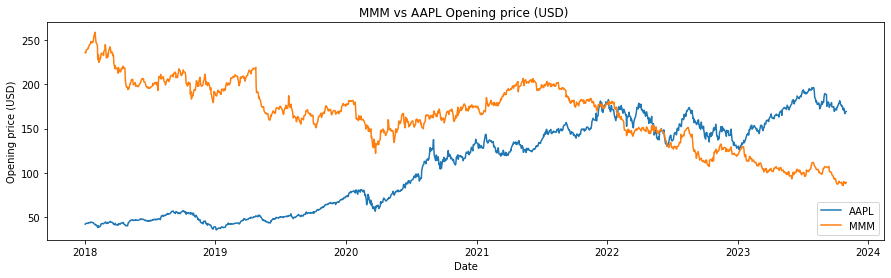

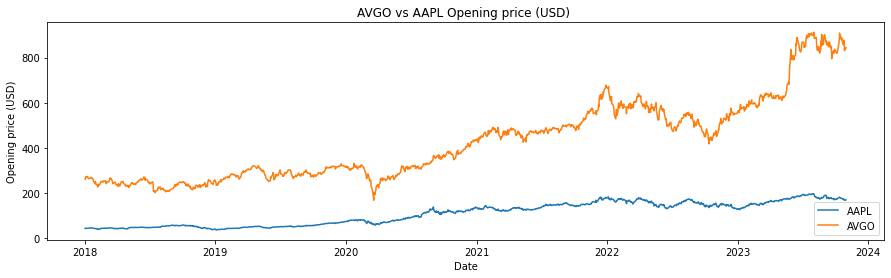

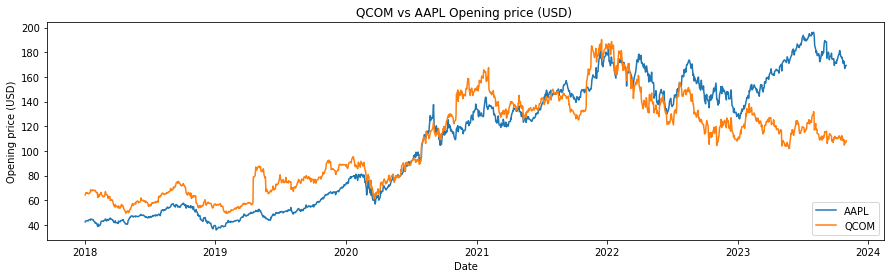

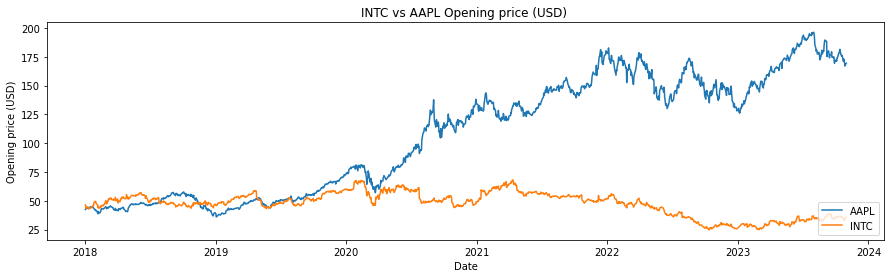

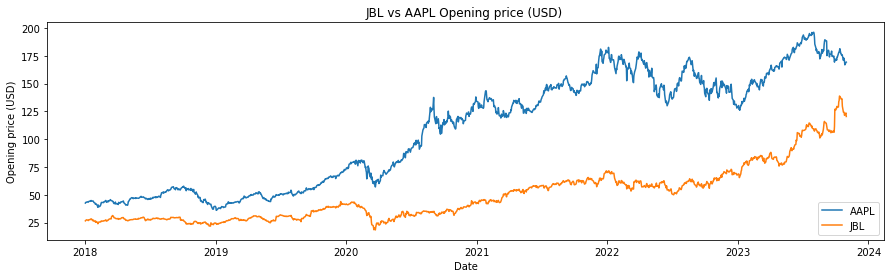

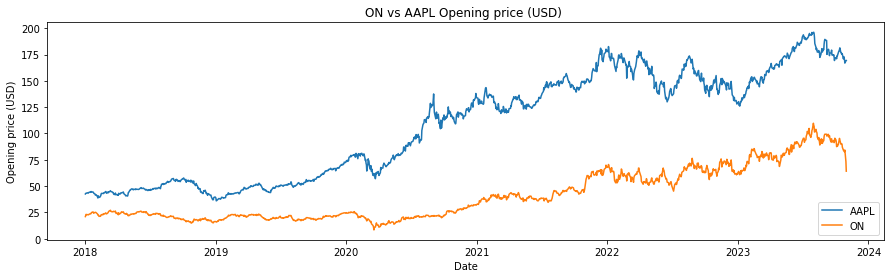

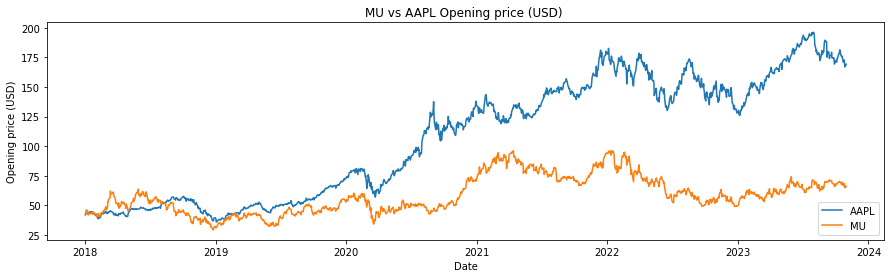

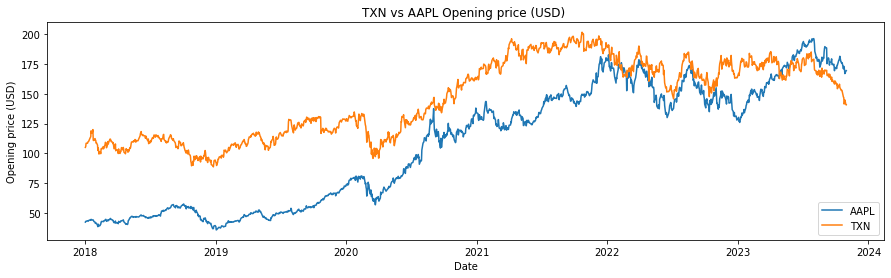

In [6]:
data_aapl =  dict_of_tables['AAPL']

for ticker in tickers[1:]:

    data =  dict_of_tables[ticker]
    
    currency = yf.Ticker(ticker).basic_info['currency']
    
    fig, ax = plt.subplots(figsize=(15, 4))

    # Add x-axis and y-axis
    ax.plot(data_aapl['Date'],data_aapl['Open'],label = 'AAPL') 
    ax.plot(data['Date'],data['Open'],label = ticker) 
    # Set title and labels for axes
    plt.legend(loc='lower right')
    ax.set(xlabel="Date",
       ylabel=f"Opening price ({currency})",
       title=f"{ticker} vs AAPL Opening price ({currency}) ")
    plt.show()

As a brief observation, we see that for all of these plots the opening price's statistics appear to vary over time. Namely, the mean appears to follow some trend, and the variance (volatility) changes over time as well. This is suggestive of non-stationary which we will explore in a later section.<br>
&nbsp;&nbsp;&nbsp;&nbsp; We now convert the store all the opening prices as one single data frame. Each row of this dataframe will consist of the `Date` and opening price for all companies `AAPL`, `MMM`,`AVGO`,`QCOM`,`INTC`,`JBL`,`ON`,`MU`, and `TXN`. This dataframe, `df_us_open`, will be used throughout. 

In [7]:
frames = [dict_of_tables[ticker].Open for ticker in tickers]
df_us_open = pd.concat(frames,axis = 1, keys = tickers)

df_us_open=df_us_open.merge(dict_of_tables[ticker].Date, left_index=True, right_index=True)

# Reorder columns
df_us_open = df_us_open[['Date']+tickers]
display(df_us_open.head(20))

Date       AAPL         MMM        AVGO       QCOM       INTC  \
0  2018-01-02  42.540001  235.779999  259.769989  64.379997  46.380001   
1  2018-01-03  43.132500  235.070007  267.290009  65.220001  45.470001   
2  2018-01-04  43.134998  237.000000  271.589996  66.180000  43.520000   
3  2018-01-05  43.360001  238.649994  271.970001  66.040001  44.430000   
4  2018-01-08  43.587502  239.380005  270.920013  66.250000  44.270000   
5  2018-01-09  43.637501  239.600006  273.059998  65.639999  44.700001   
6  2018-01-10  43.290001  241.000000  265.980011  65.480003  43.330002   
7  2018-01-11  43.647499  240.740005  263.570007  65.199997  42.799999   
8  2018-01-12  44.044998  243.070007  263.390015  65.610001  43.450001   
9  2018-01-16  44.474998  245.300003  265.179993  66.230003  43.549999   
10 2018-01-17  44.037498  246.850006  265.480011  68.519997  43.549999   
11 2018-01-18  44.842499  248.130005  265.459991  67.750000  44.400002   
12 2018-01-19  44.652500  246.630005  269.149994  68.040001  44.619999   
13 2018-01-22  44.325001  247.130005  265.649994  67.809998  44.799999   
14 2018-01-23  44.325001  246.910004  261.739990  68.599998  45.810001   
15 2018-01-24  44.312500  247.990005  260.970001  68.199997  45.900002   
16 2018-01-25  43.627499  250.000000  257.739990  68.139999  45.880001   
17 2018-01-26  43.000000  253.429993  249.419998  67.940002  48.380001   
18 2018-01-29  42.540001  258.510010  248.279999  68.160004  49.599998   
19 2018-01-30  41.382500  255.600006  241.250000  67.430000  49.480000   

          JBL         ON         MU         TXN  
0   26.500000  21.030001  41.540001  105.110001  
1   26.799999  22.000000  44.500000  105.879997  
2   27.219999  23.170000  45.990002  108.480003  
3   27.490000  22.850000  46.130001  108.699997  
4   27.180000  22.850000  45.310001  108.550003  
5   27.129999  22.879999  45.270000  109.620003  
6   26.799999  22.639999  41.950001  109.849998  
7   27.000000  22.799999  43.520000  110.050003  
8   27.400000  23.129999  42.820000  110.739998  
9   27.870001  23.820000  43.139999  113.550003  
10  27.730000  23.620001  43.209999  113.949997  
11  28.200001  24.059999  44.209999  119.000000  
12  28.260000  24.920000  43.950001  117.010002  
13  26.830000  25.170000  42.470001  117.919998  
14  26.660000  25.500000  43.250000  120.019997  
15  27.209999  24.660000  43.759998  111.139999  
16  27.030001  24.910000  44.230000  110.860001  
17  26.219999  24.410000  43.220001  110.930000  
18  26.350000  25.010000  43.250000  112.470001  
19  25.540001  25.080000  41.990002  111.199997

### Correlation

We now compute the correlation between each stock opening price. We present the correlation in the form of a heatmap.

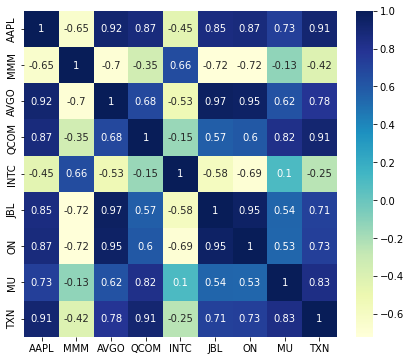

In [8]:
import seaborn as sns
plt.subplots(figsize=(7, 6))
sns.heatmap(df_us_open.corr(),cmap="YlGnBu", annot=True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; Based on the correlation heat map above, we see that may pairs of stocks are correlated. In either case, it is interesting to point out that one of the strongest relationship is between Jabil (JBL) and Broadcom (AVGO). If we now only consider the relationship between Apple and the other stocks, there is all high correlation. However, these may correlations may be spurious as elluded to in the introduction. Particularly, if the opening prices are non-stationary, then the correlation values are not to be trusted. In the next section we test for the non-stationary of the opening price.

### Non-stationarity

&nbsp;&nbsp;&nbsp;&nbsp; Looking at the previous plots of the opening price, one expects the processes to be non-stationary. I.e. the plots mean and variance appear to vary over time. We now verify that our processes are indeed non-stationary stochastic processes making use of hypothesis tests. To do so, we make use of two classic hypothesis tests for non-stationarity. We make use of the **augmented Dickey–Fuller test** and the **Kwiatkowski–Phillips–Schmidt–Shin** (**KPSS**).

The  **augmented Dickey–Fuller test** (**ADF**)  tests the following hypothesis:

<p style='text-align: center;'>$H_0:$ The Stochastic Process is Non-Stationary vs $H_a:$ The Stochastic Process is Stationary.  </p>

We use the ADF test in combination with the KPSS test. Where the **Kwiatkowski–Phillips–Schmidt–Shin** (**KPSS**) tests the following hypothesis:
<p style='text-align: center;'>$H_0:$ The Stochastic Process is Stationary vs $H_a:$ The Stochastic Process is Non-Stationary.  </p>

To compute these tests we use the module [statsmodels](https://www.statsmodels.org/stable/index.html). In particular, we make use of [statsmodels.tsa](https://www.statsmodels.org/stable/tsa.html) which proves usefull for time-series analysis. (Read more about statsmodels ADF [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) and statsmodels KPSS [here](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html)).


In [9]:
from statsmodels.tsa.stattools import adfuller , kpss

import warnings

df_test_statistics = pd.DataFrame(columns=['Ticker','Currency','ADF Test Statistic','ADF p-value','KPSS Test Statistic','KPSS p-value'])

for ticker in tickers:
    currency = yf.Ticker(ticker).basic_info['currency']
    
    data =  df_us_open[ticker]
    adf = adfuller(data,regression='ctt')
    adf_test_stat = adf[0]
    adf_pvalue = adf[1]
    
    # We ignore warnings here as we encounter a minor warning when computing the kpss test statistic.
    # The p-values returned are smaller than the actual p-values
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        kp=kpss(data, regression='ct', nlags='auto', store=False)
    
    kpss_test_stat= kp[0]
    kpss_pvalue= kp[1]
    row = [ticker,currency,adf_test_stat,adf_pvalue,kpss_test_stat,kpss_pvalue]
    df_test_statistics.loc[len(df_test_statistics.index)] = row

In [10]:
display(df_test_statistics)

Ticker Currency  ADF Test Statistic  ADF p-value  KPSS Test Statistic  \
0   AAPL      USD           -2.660836     0.476706             0.489446   
1    MMM      USD           -2.668843     0.472112             0.576291   
2   AVGO      USD           -3.120274     0.241152             0.453083   
3   QCOM      USD           -2.854588     0.368768             0.836218   
4   INTC      USD           -3.109173     0.245853             0.985813   
5    JBL      USD           -2.093311     0.778753             0.723809   
6     ON      USD           -3.141115     0.232490             1.116915   
7     MU      USD           -2.589395     0.517890             0.541731   
8    TXN      USD           -1.894647     0.854108             0.684662   

   KPSS p-value  
0          0.01  
1          0.01  
2          0.01  
3          0.01  
4          0.01  
5          0.01  
6          0.01  
7          0.01  
8          0.01

&nbsp;&nbsp;&nbsp;&nbsp;  Focusing on the *ADF p-value* column, we see that we fail to reject at a almost any reasonable significance level ($\alpha = 0.05$) for each of the data sets. In particular, we fail to reject that the time-series have non-stationary distributions. To reinforce this, an examination of the *KPSS p-value* column shows that we consistently reject the hypothesis that the time-series have stationary distribution at a significance level of $\alpha = 0.05$. This suggests that if we were to compute the covariance between the processes, the value would likely be meaning less. Therefore, it is unreasonable to trust the estimated correlation as something meaningful and our search for conintegration is not unfound. <br>
&nbsp;&nbsp;&nbsp;&nbsp; We note that the suppressed warning returned by the KPSS test reads.
```InterpolationWarning: The test statistic is outside of the range of p-values available in the look-up table. The actual p-value is smaller than the p-value returned.``` Namely, for any reasonable siginificance level ($\alpha > 0.01$) we reject the hypothesis that these processes are stationary. This suggests that it overwhelmingly the case that the opening prices are non-stationary.

### Cointegration

&nbsp;&nbsp;&nbsp;&nbsp; We now aim to check for cointegration between Apple and other stocks traded in USD. Here we use the dataframe which was used to compute correlation. In particular, we would like to estimate $\alpha$ and $\beta$ and $\gamma$ such that $\alpha X(t) + \beta Y(t) + \gamma $ is stationary. To do so, we follow the Engle-Granger Two Step Method:
1. Estimate $\alpha/\beta$ and  $\gamma/\beta$ by means of ordinary least squares. In particular we regress $X(t)$ on $Y(t)$ such that we obtain estimates

$$\hat{Y}(t) = \alpha/\beta X(t) + \gamma/\beta$$

2. Use the Augmented Dicky-Fuller test to check for stationarity of the residuals given by 

$$Y(t) - \hat{Y}(t) = Y(t) - (\alpha/\beta X(t) + \gamma/\beta) $$

(For more information on the Engle-Granger Two Step Method click [here](https://warwick.ac.uk/fac/soc/economics/staff/gboero/personal/hand2_cointeg.pdf))<br>
&nbsp;&nbsp;&nbsp;&nbsp; Below we define a funtion `cointegration_test` which performs the Engle-Granger Two Step Method for two time-series as inputs. The function makes use of statsmodels [OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) to estimate the paramters $\alpha$, $\beta$, and $\gamma$ and the statsmodels ADF test. `cointegration_test` then returns the ADF test statistic, p-value, number of lags used, the ordinary least squares p-values, and residuals.
We keep track of the ordinary least squares p-values as to make sure we have a good fit.

In [11]:
import statsmodels.api as sm

def cointegration_test(Y,X):
    # Fit OLS
    X = sm.add_constant(X)
    ols = sm.OLS(Y,X).fit()
    ols_pvalues = ols.pvalues[0]
    
    residuals = ols.resid
    
    # Perform ADF test on residuals
    adf = adfuller(residuals,autolag='AIC')
    adf_test_stat = adf[0]
    adf_pvalue = adf[1]
    lags = adf[2]
    return adf_test_stat, adf_pvalue, lags, ols_pvalues, residuals


In [12]:
from scipy import stats

# Create Blank Dataframe To store Cointegration data
df_us_conintegration = pd.DataFrame(columns=['Ticker',
                                             'OLS p-value',
                                             'ADF Test Statistic',
                                             'ADF p-value',
                                            'ADF lags'])

for ticker in tickers[1:]:
    adf_test_stat, adf_pvalue,lags,ols_pvalues, residuals= cointegration_test(df_us_open['AAPL'],df_us_open[ticker])
    row = [ticker,ols_pvalues,adf_test_stat,adf_pvalue , lags]
    df_us_conintegration.loc[len(df_us_conintegration.index)] = row

In [13]:
display(df_us_conintegration)

Ticker    OLS p-value  ADF Test Statistic  ADF p-value  ADF lags
0    MMM   0.000000e+00           -1.808127     0.376434         1
1   AVGO   2.913306e-01           -1.474662     0.546006         3
2   QCOM   1.878647e-21           -1.294550     0.631662         2
3   INTC  5.192774e-223           -1.836573     0.362461         1
4    JBL   1.415619e-42           -1.045917     0.736151         1
5     ON  7.516104e-140           -2.022863     0.276639         2
6     MU   4.249937e-17           -1.845347     0.358192         0
7    TXN  2.733261e-224           -1.600961     0.483111         1

&nbsp;&nbsp;&nbsp;&nbsp; We see that overall all the time points, at any reasonablly small significance level, we fail to detect any cointegration. Namely, all our p-values based on the ADF test of the spread are rather large. Therefore, we consistently fail to reject the null hypothesis that spread is non-stationary. Although we do not detect any cointegration over all time, it is possible that their are periods of time for which the stocks are cointegrated. 
### Cointegration over intervals

&nbsp;&nbsp;&nbsp;&nbsp; We now repeat the preivous calculations of the Engle-Granger Two Step Method for time intervals consisting of 50 days. In particular, we define a function `cointegration_window` and takes as input:  time interval `t` for which to compute the cointegration test, `delta` a rate for which to move the interval window forward, a dataframe of all stocks opening price `df_open`, and the ticker of a stock the stock of interest `ticker_of_interest`. The function then preformes the Engle-Granger Two Step Method cointegration test for each stock in the `df_open` and the `ticker_of_interest` for every interval of length `t`. `cointegration_window` then  returns a dataframe which consists statistiscs concerning the cointegraiton test for all intervals of length `t`. cointegration test statistics include:
* Ordinary least squares p-value (`OLS p-value`)
* ADF Test Statistic (`ADF Test Statistic`)
* ADF p-value (`ADF p-value`)
* ADF lags used (`ADF lags`)
* Date Initial (`Date Initial`)
* Date Final (`Date Final`)

In particular, we will set `ticker_of_interest` = `'AAPL'`.

In [14]:
def cointegration_window(t,delta,df_open,ticker_of_interest):
    n=len(df_open)
    df_us_conintegration_window = pd.DataFrame(columns=['Ticker',
                                                    'OLS p-value',
                                                    'ADF Test Statistic',
                                                    'ADF p-value',
                                                    'ADF lags',
                                                    'Date Initial',
                                                    'Date Final'])

    for i in range(0,n-t,delta):
        m = i
        M = i+t
        date_time_min = df_open.iloc[m]['Date']
        date_time_max = df_open.iloc[M]['Date']
        date_min = str(date_time_min.year) + '-' +str(date_time_min.month) +'-' +str(date_time_min.day)
        date_max = str(date_time_max.year) + '-' +str(date_time_max.month) +'-' +str(date_time_max.day)
    
        date_interval = date_min + ' to ' + date_max
  
    
        for ticker in tickers[1:]:
            interest_interval = df_open.iloc[m:M][ticker_of_interest]
            pair_interval = df_open.iloc[m:M][ticker]
        
            adf_test_stat, adf_pvalue,lags,ols_pvalues,residuals = cointegration_test(interest_interval,pair_interval)
        
        
            row = [ticker,ols_pvalues,adf_test_stat,adf_pvalue, lags, date_time_min,date_time_max ]
            df_us_conintegration_window.loc[len(df_us_conintegration_window.index)] = row
    return df_us_conintegration_window


We check for cointegration for intervals of 100 days (`t=100`) and push the interval at a rate of 10 days (`delta = 10`). In addition, we check for presence of statistically significant stationary within the spread using a significance level of $\alpha =0.05$. To do, so only take time intervals where the ADF p-value and OLS p-value are less than $\alpha$.

In [15]:
t = 100 #Set interval to 100 day
delta = 10 # Set the rolling window difference
df_us_conintegration_window = cointegration_window(t,delta ,df_us_open ,'AAPL')


sig_level = 0.05
# Build dataframe with statistically significant cointegration
cointegration = df_us_conintegration_window.loc[ (df_us_conintegration_window['ADF p-value'] < sig_level) & (df_us_conintegration_window['OLS p-value'] < sig_level)].copy()
display(cointegration.head())

Ticker   OLS p-value  ADF Test Statistic  ADF p-value  ADF lags  \
0     MMM  1.028398e-35           -2.973659     0.037429         4   
3    INTC  4.543210e-23           -3.167673     0.021934         4   
6      MU  1.404454e-43           -2.924273     0.042597         4   
8     MMM  1.142343e-37           -2.887241     0.046852         4   
11   INTC  7.146615e-15           -3.347610     0.012880         4   

   Date Initial Date Final  
0    2018-01-02 2018-05-25  
3    2018-01-02 2018-05-25  
6    2018-01-02 2018-05-25  
8    2018-01-17 2018-06-11  
11   2018-01-17 2018-06-11

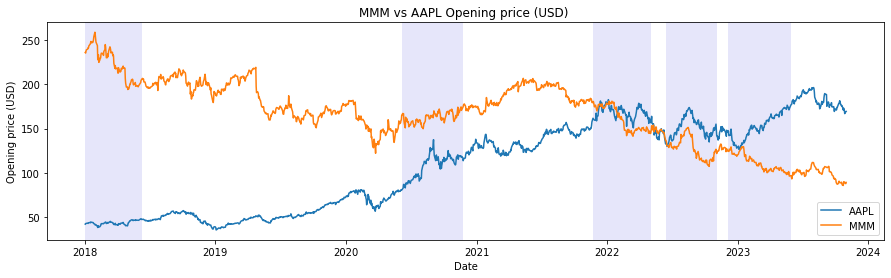

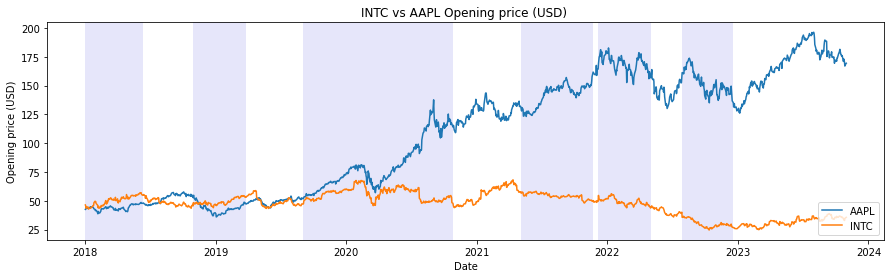

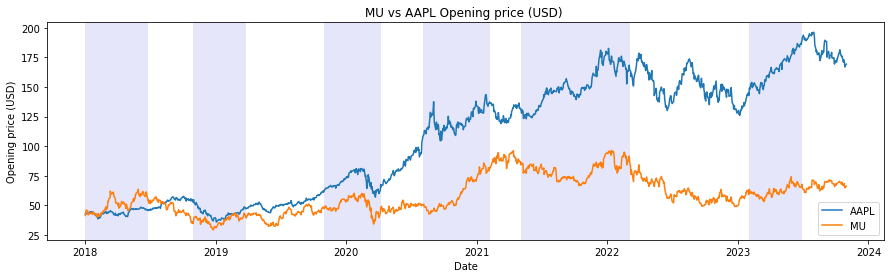

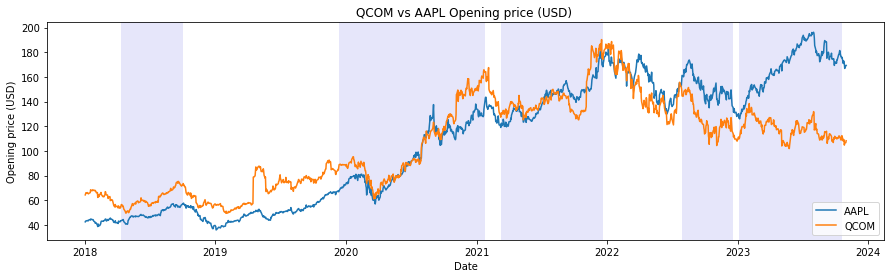

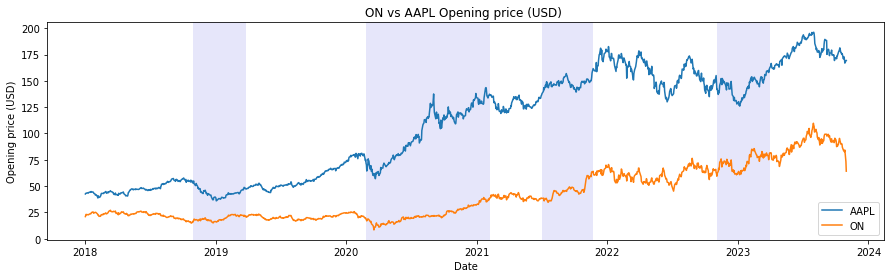

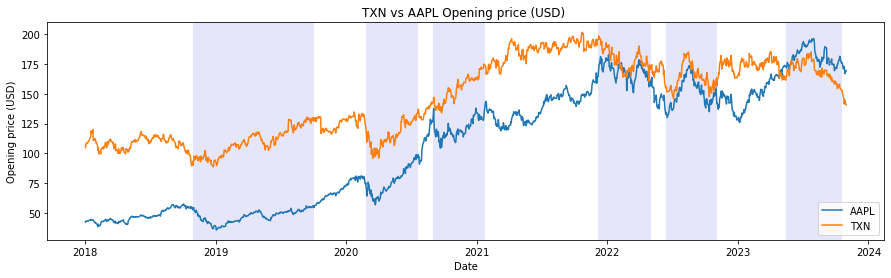

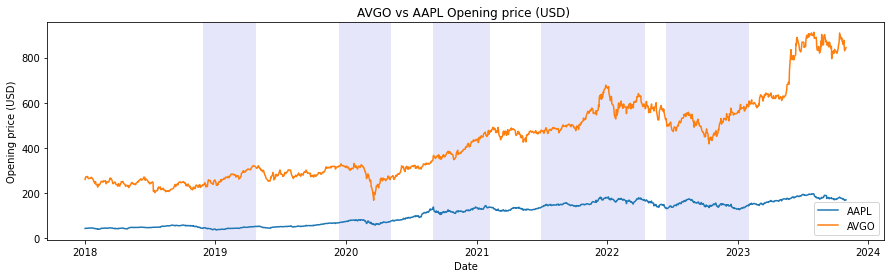

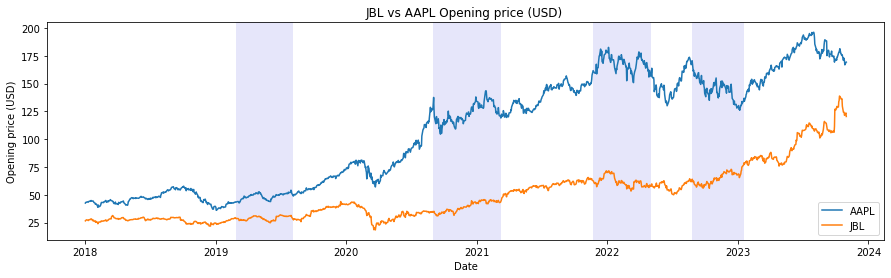

In [16]:
for ticker in cointegration['Ticker'].unique():
    fig, ax = plt.subplots(figsize=(15, 4))

    # Add x-axis and y-axis
    for pvalue, init, final in cointegration.loc[cointegration['Ticker']==ticker][['ADF p-value','Date Initial', 'Date Final']].values:
        ax.axvspan(init, final, facecolor='lavender') 
    ax.plot(data_aapl['Date'],data_aapl['Open'],label = 'AAPL') 
    ax.plot(df_us_open['Date'],df_us_open[ticker],label = ticker) 
    # Set title and labels for axes
    plt.legend(loc='lower right')
    
    ax.set(xlabel="Date",
        ylabel=f"Opening price ({currency})",
        title=f"{ticker} vs AAPL Opening price ({currency}) ")
    plt.show()

We see that for each of the 8 companies, there are multiple 100 day intervals for which the company is conintegrated with Apple. Let us now zoom in to each of these plots so we get a better sense of the cointegration behavior. Below we plot each of these blue regions as well as the residual plot of the ordinary least squares computed in the first step of the Engle-Granger Two Step Method.

AAPL and MMM


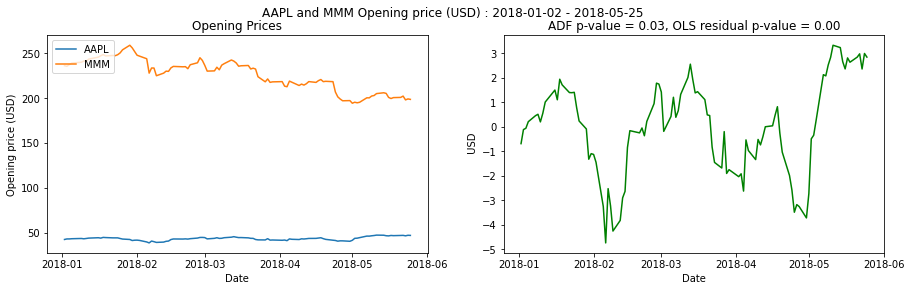

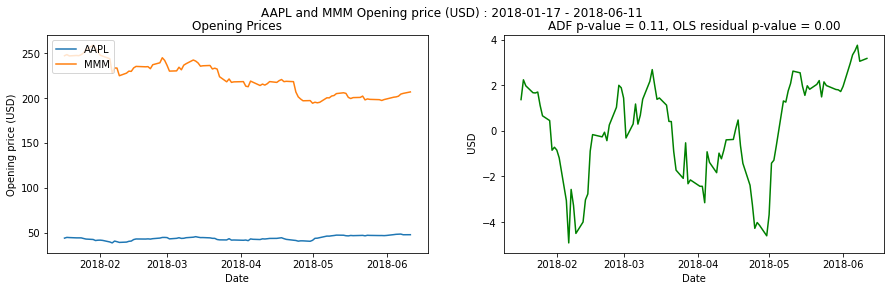

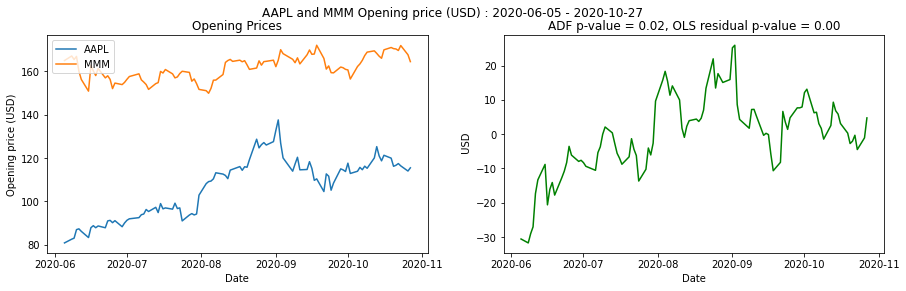

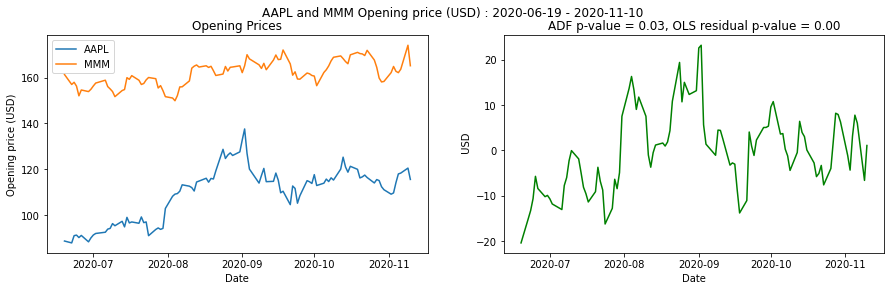

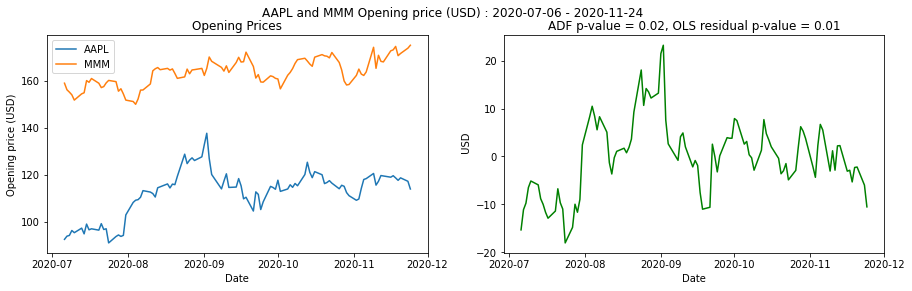

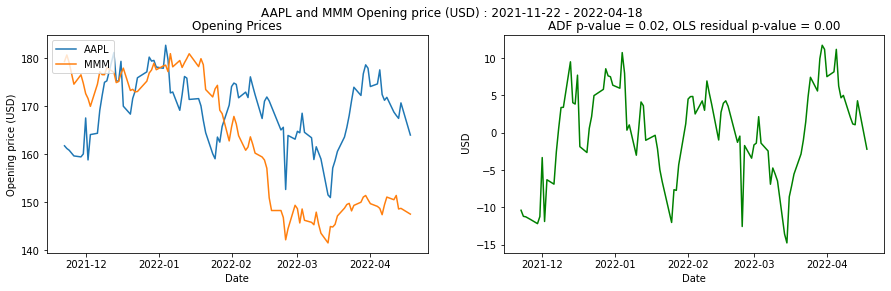

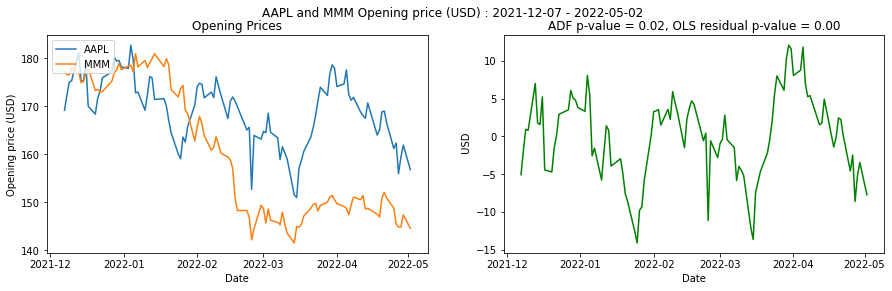

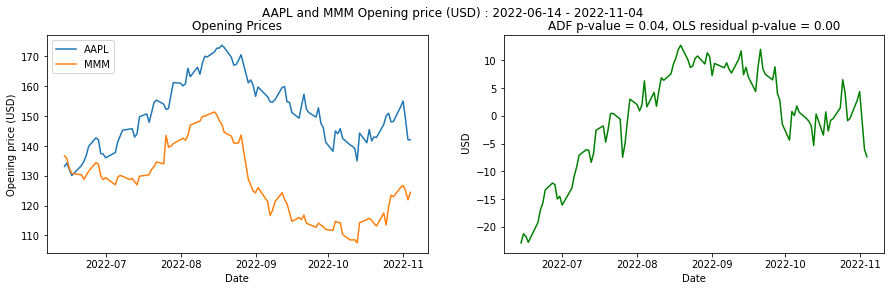

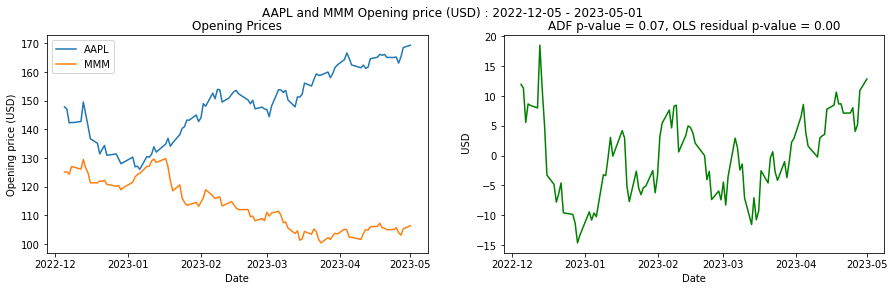

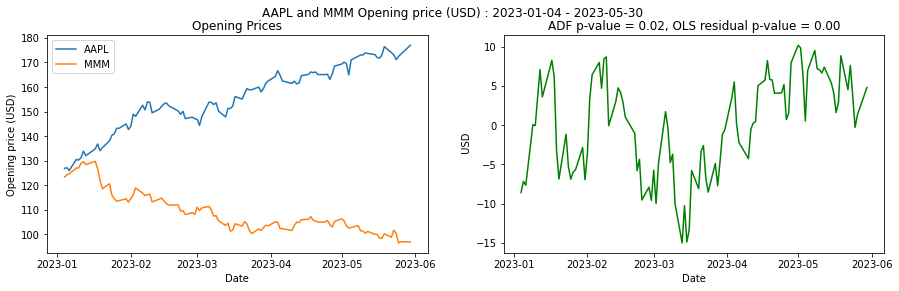

AAPL and INTC


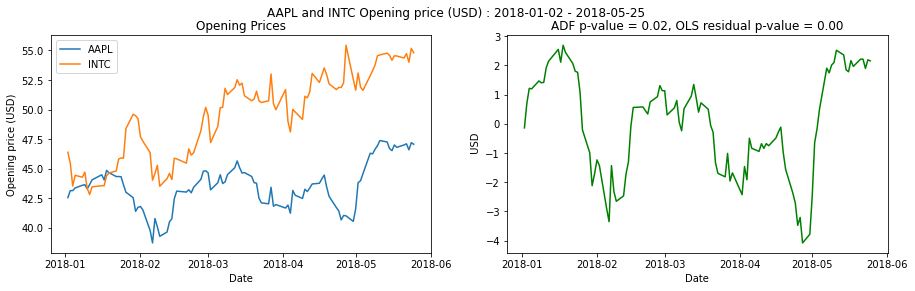

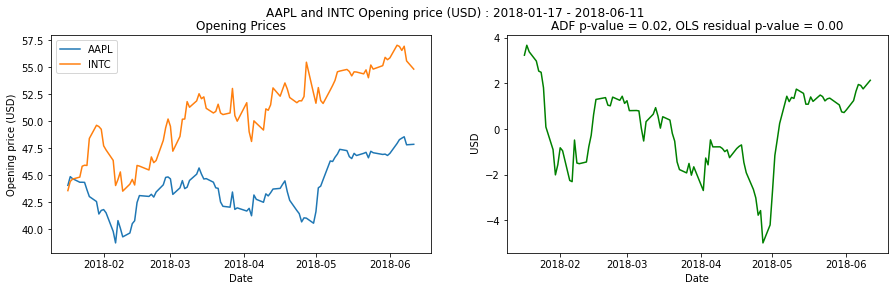

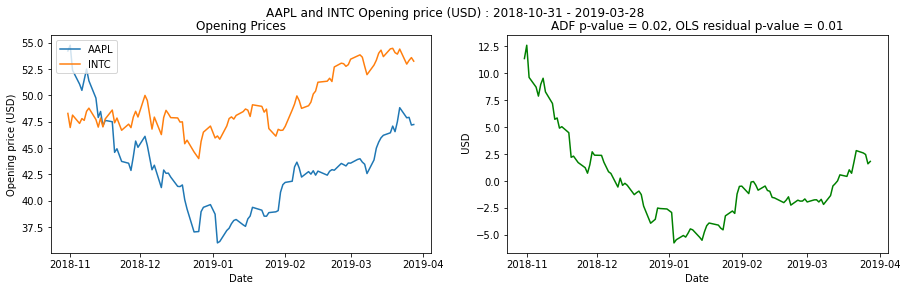

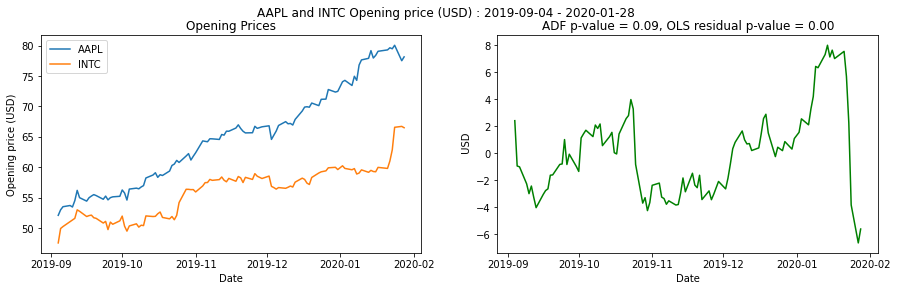

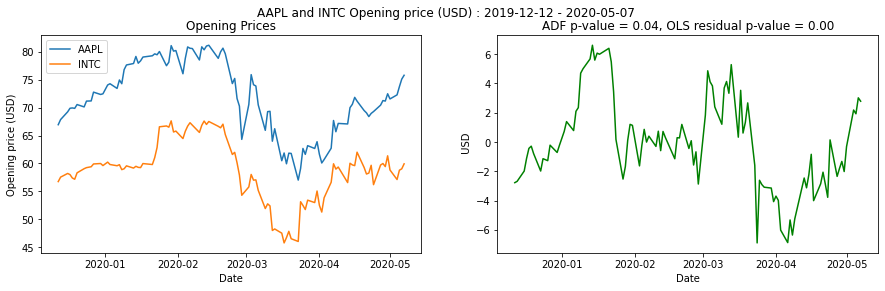

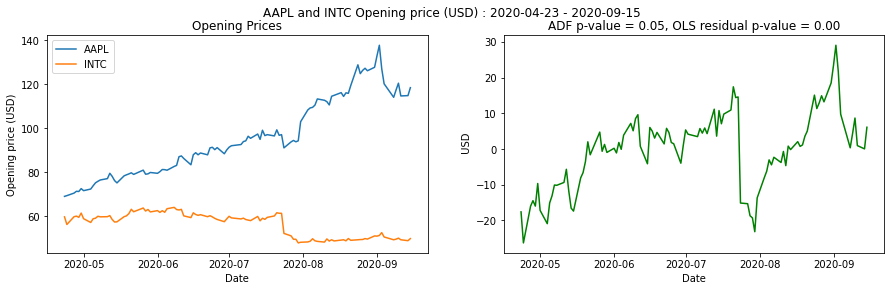

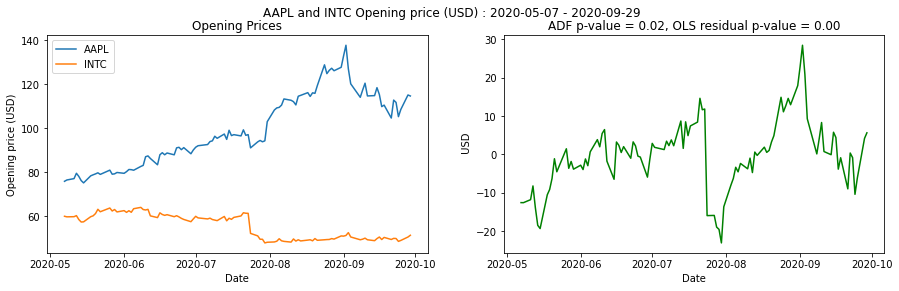

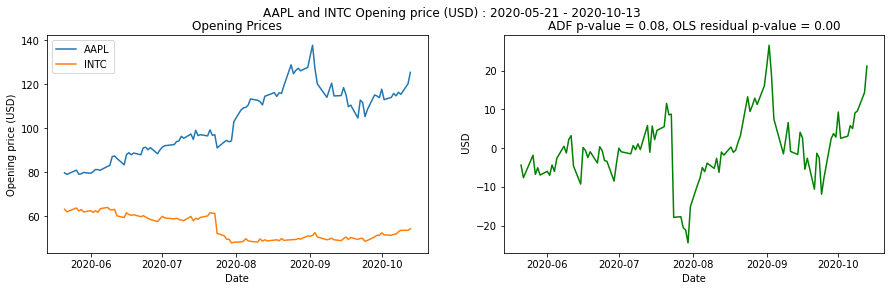

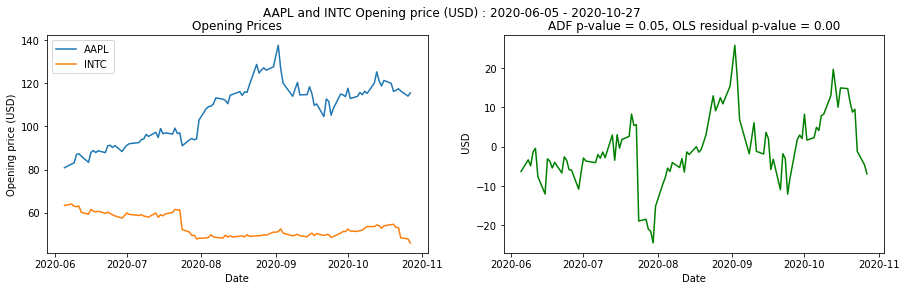

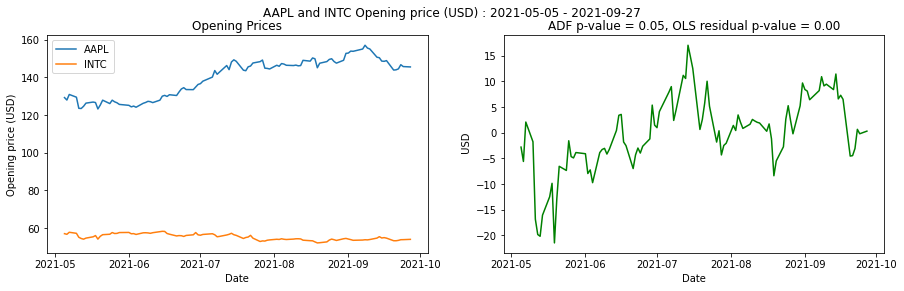

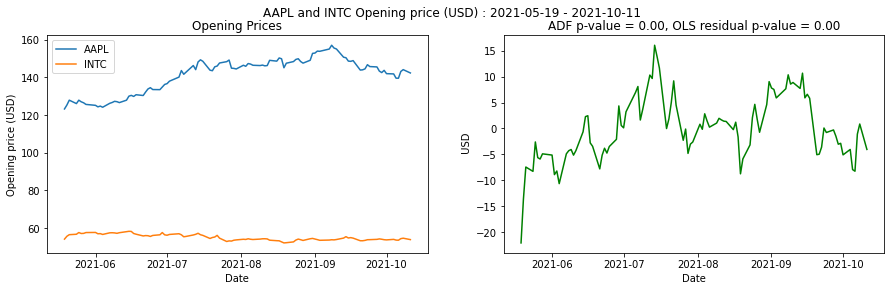

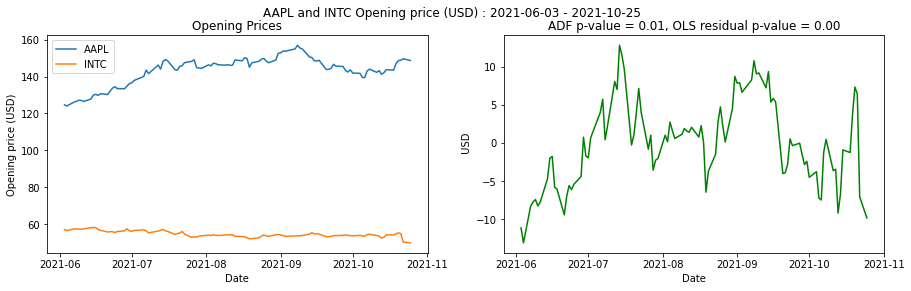

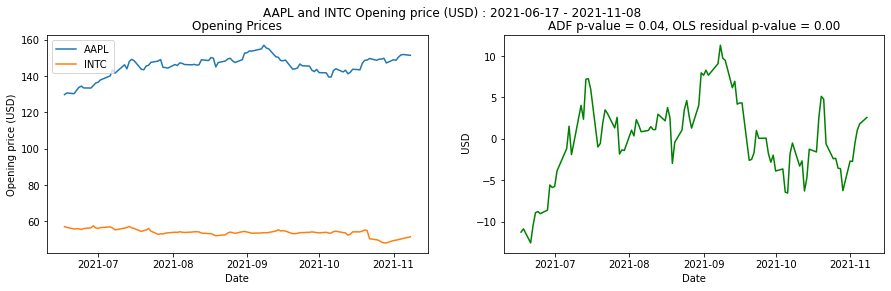

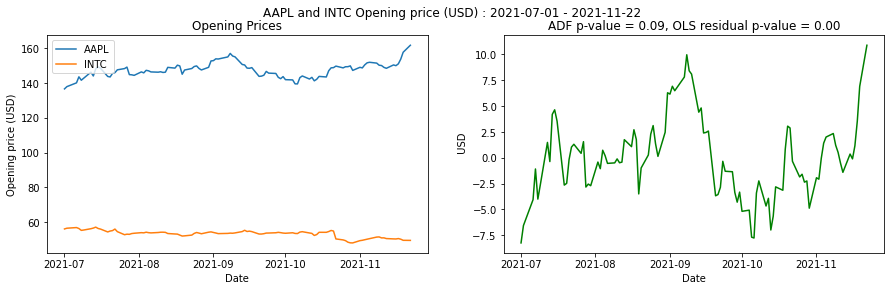

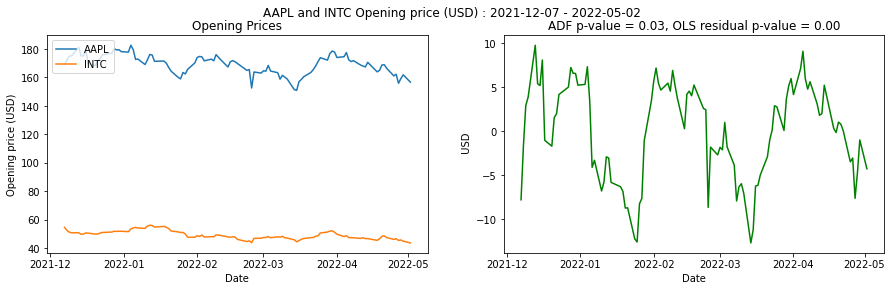

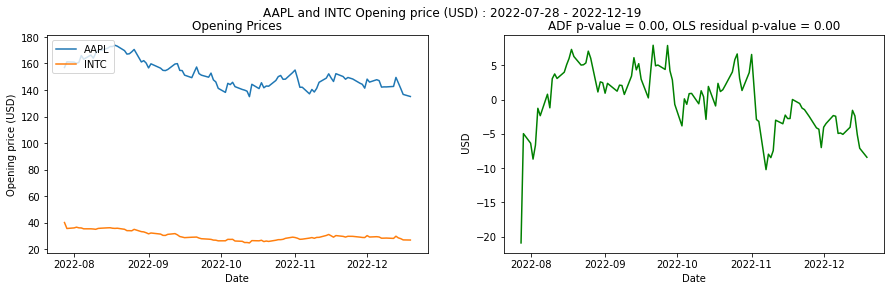

AAPL and MU


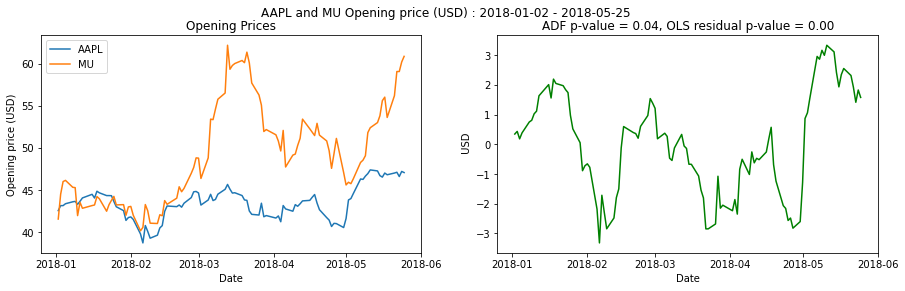

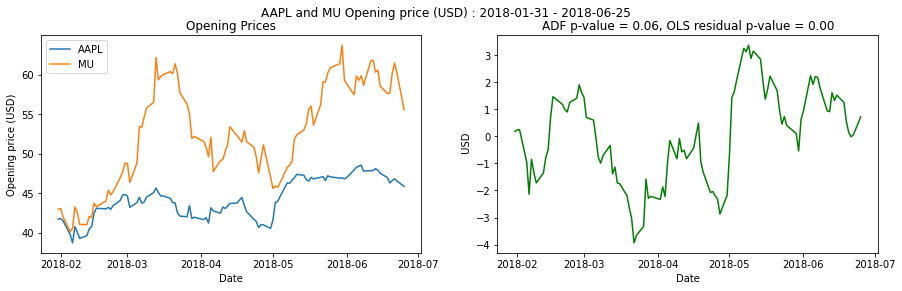

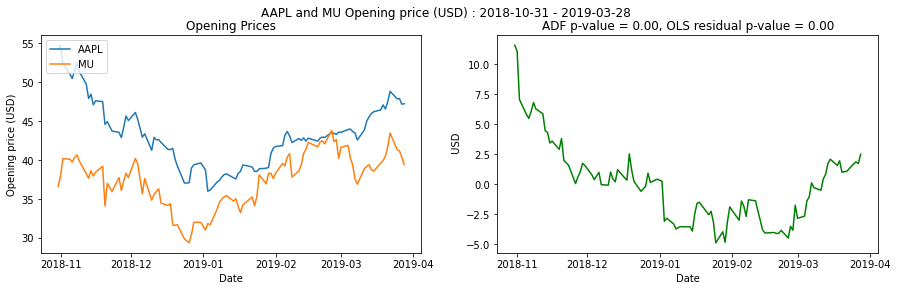

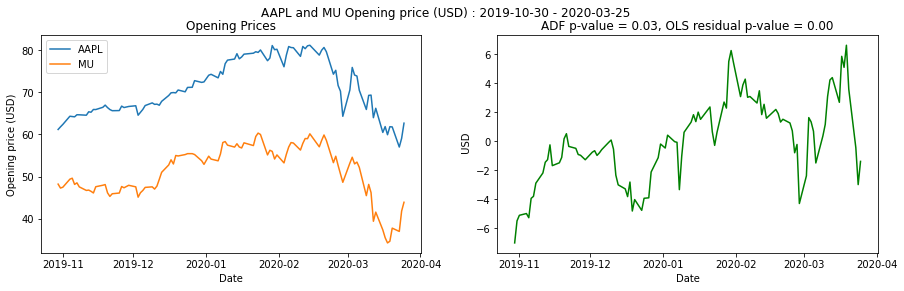

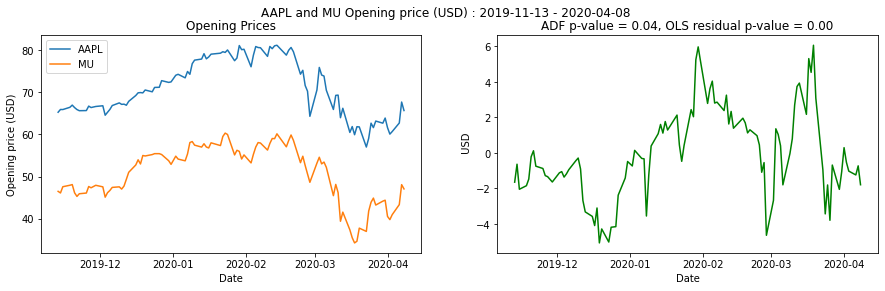

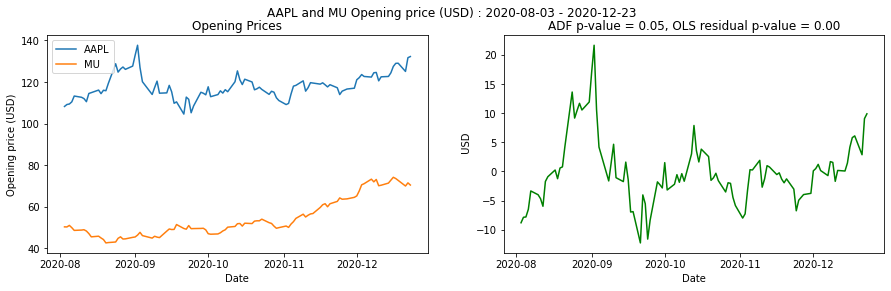

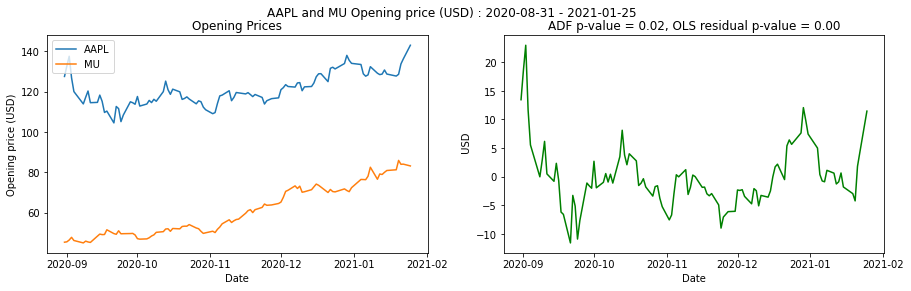

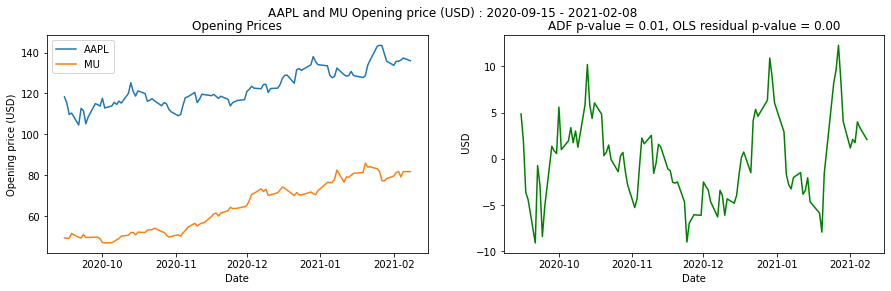

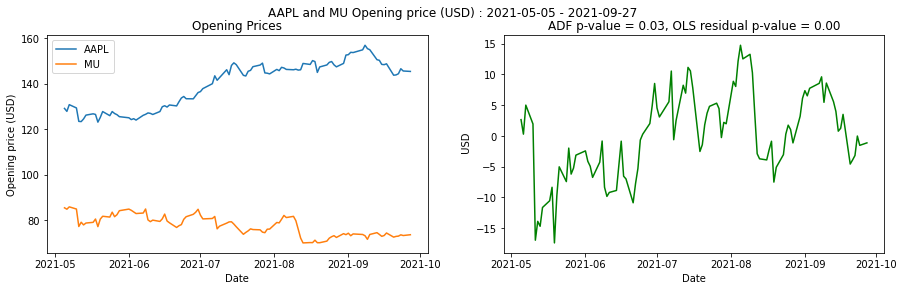

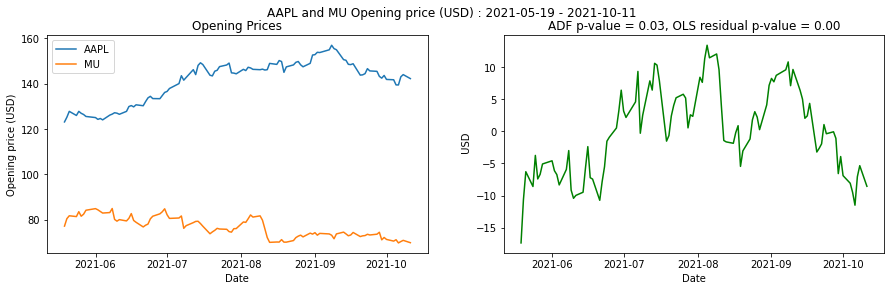

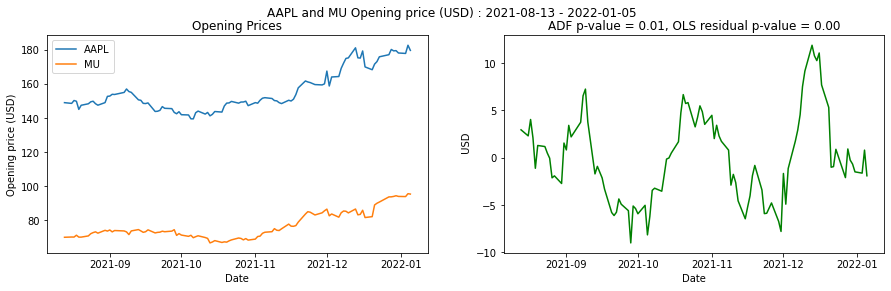

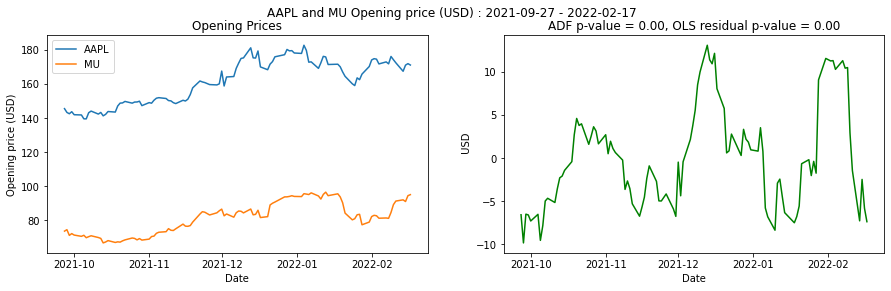

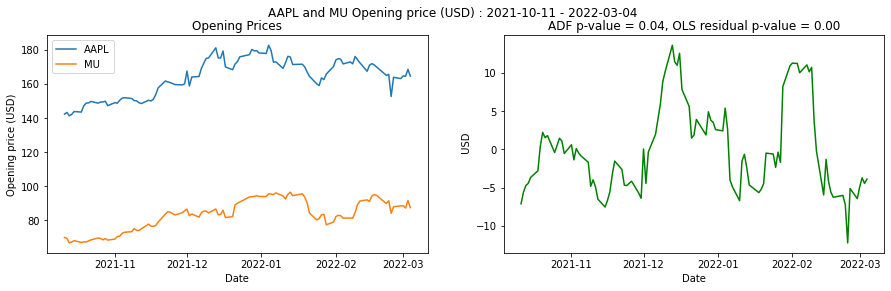

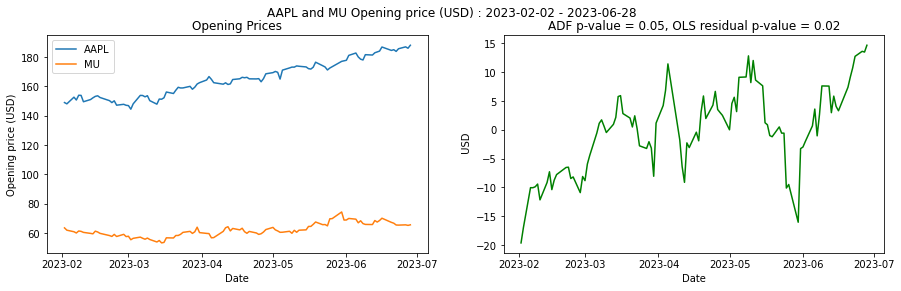

AAPL and QCOM


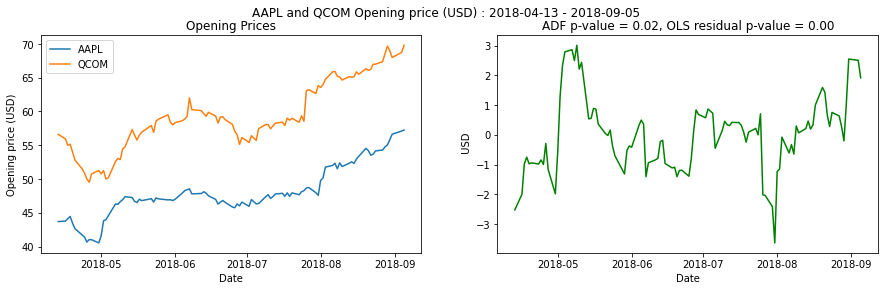

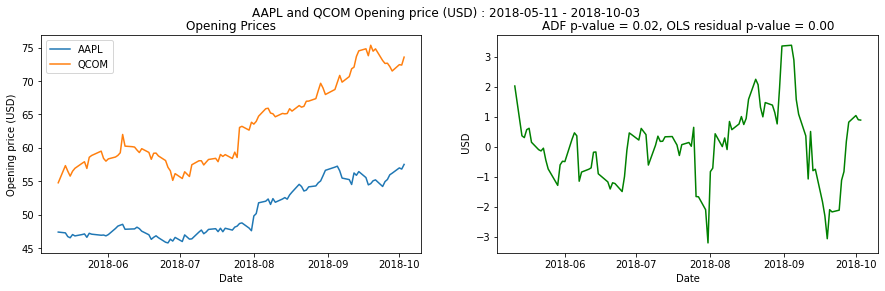

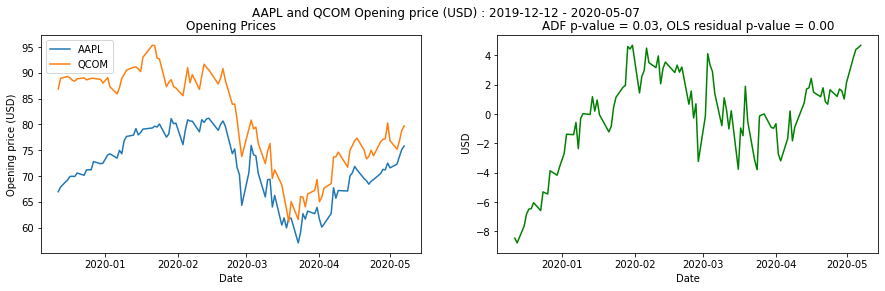

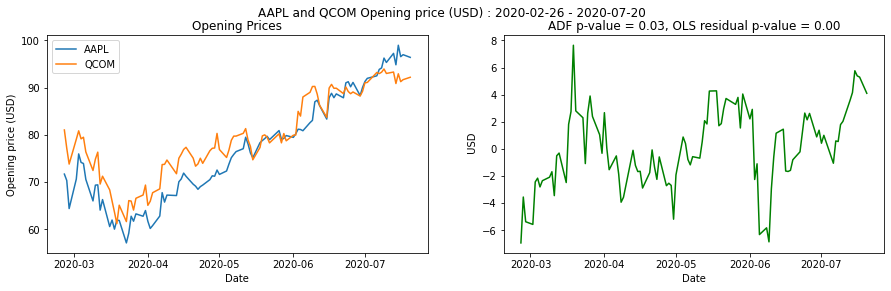

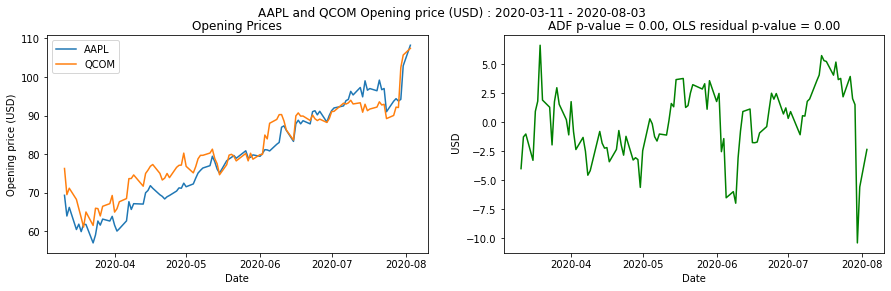

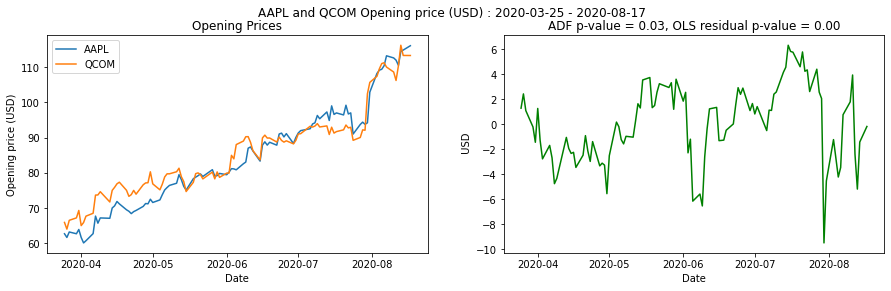

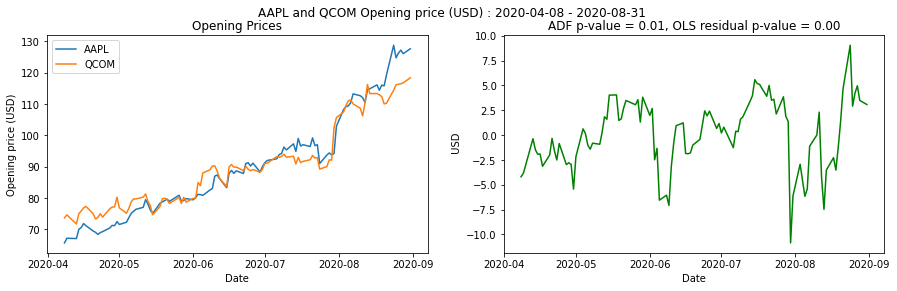

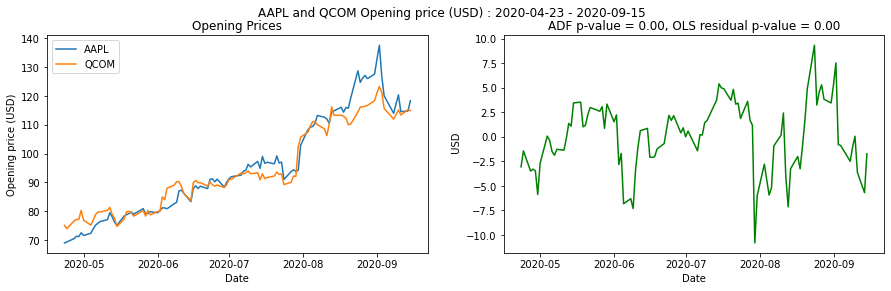

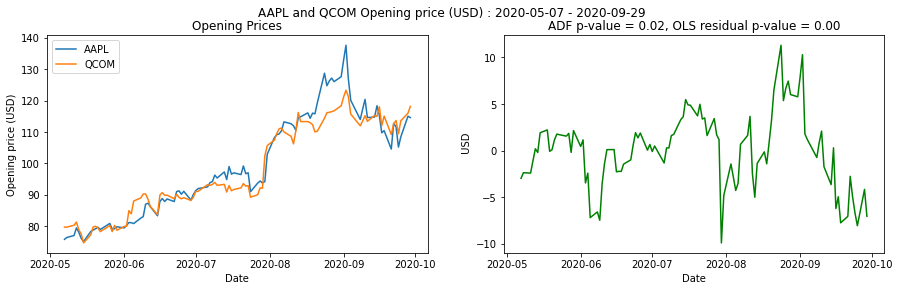

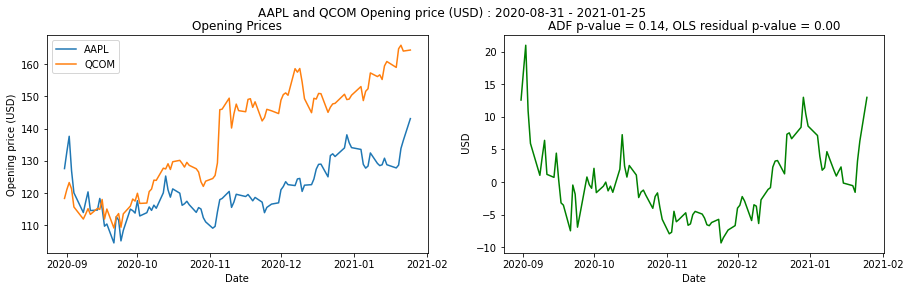

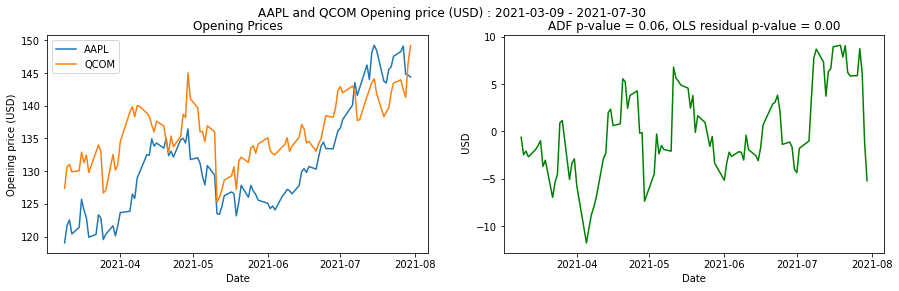

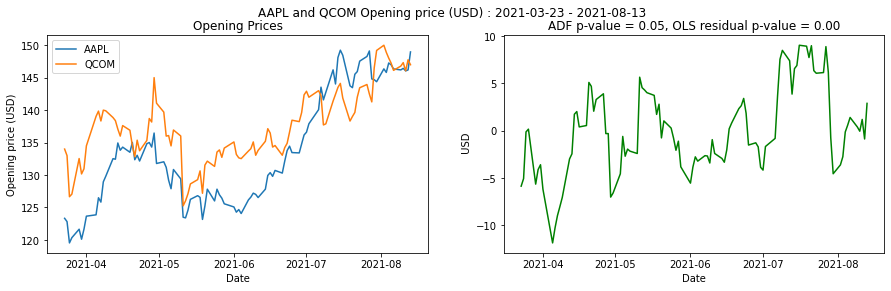

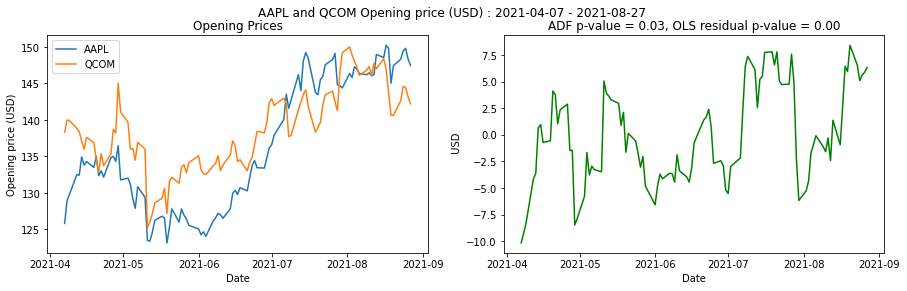

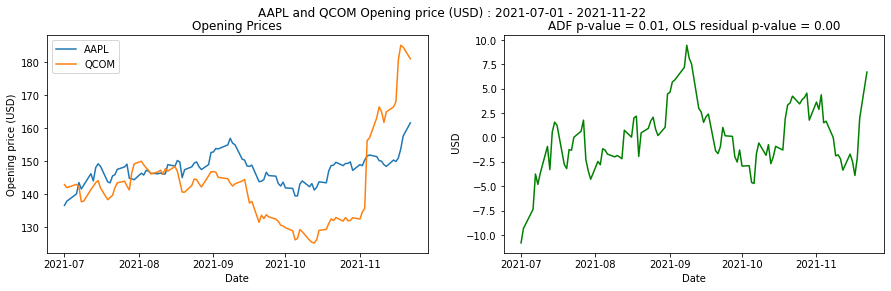

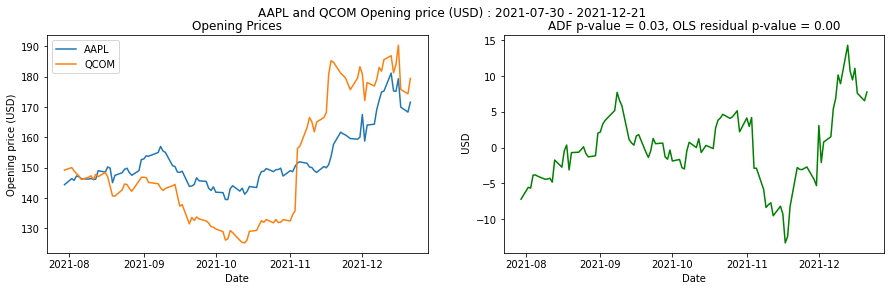

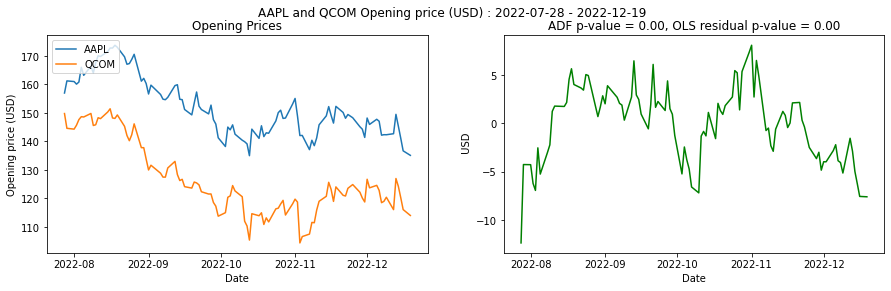

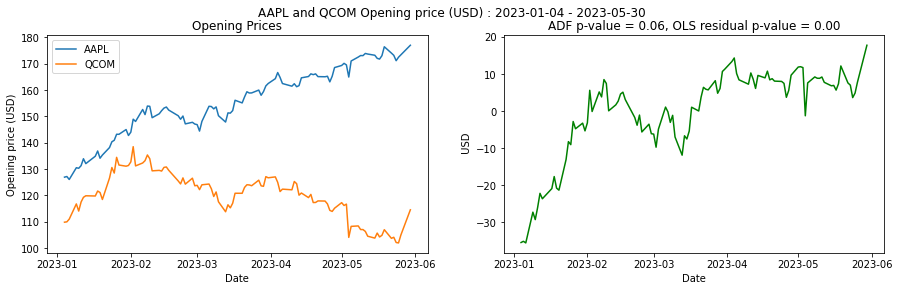

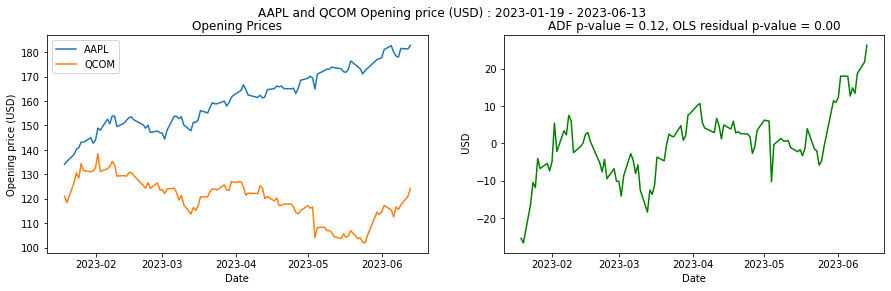

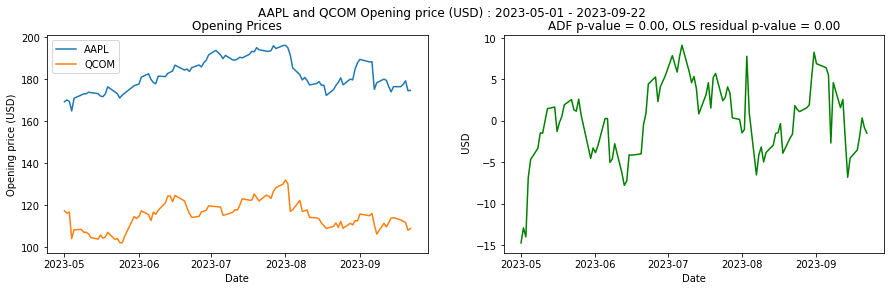

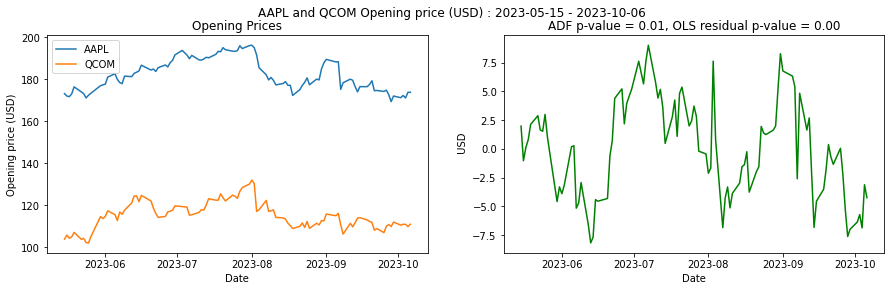

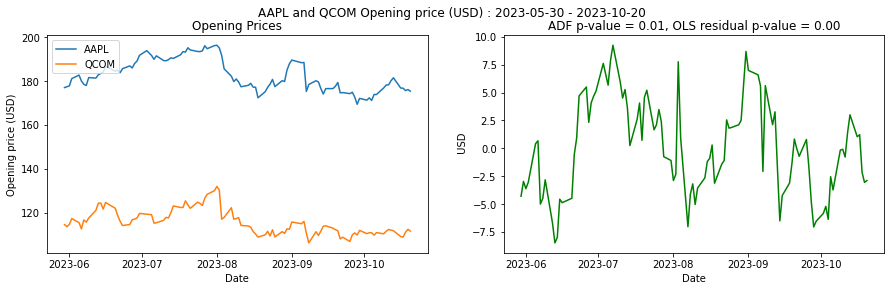

AAPL and ON


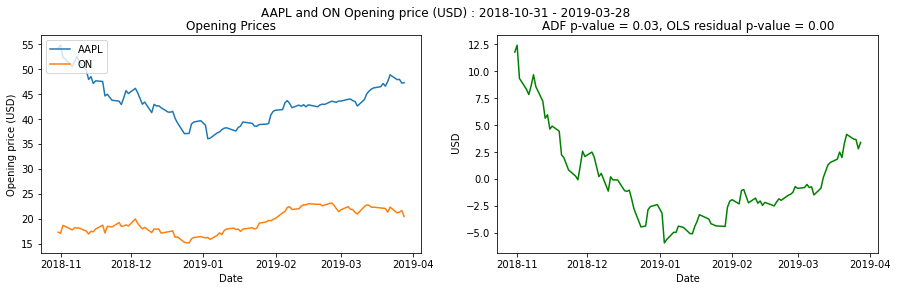

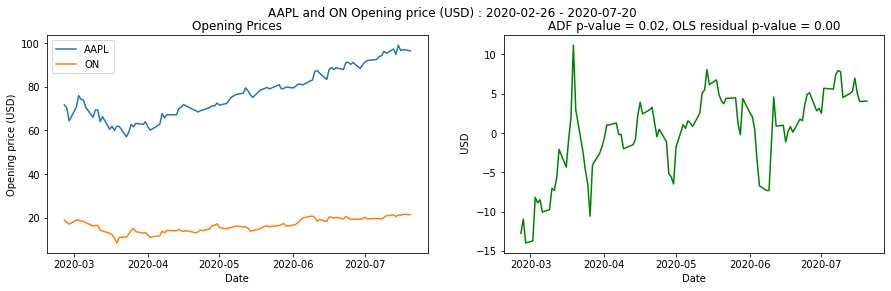

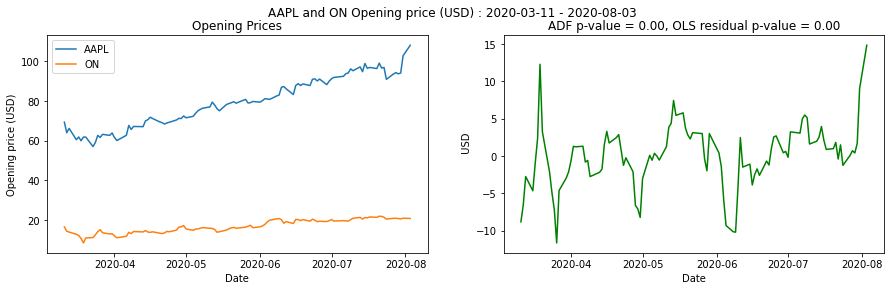

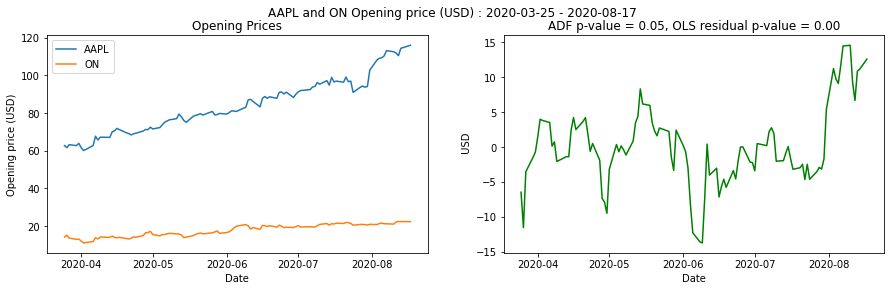

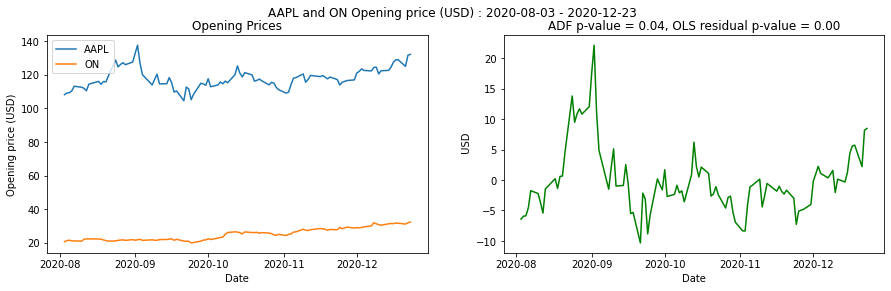

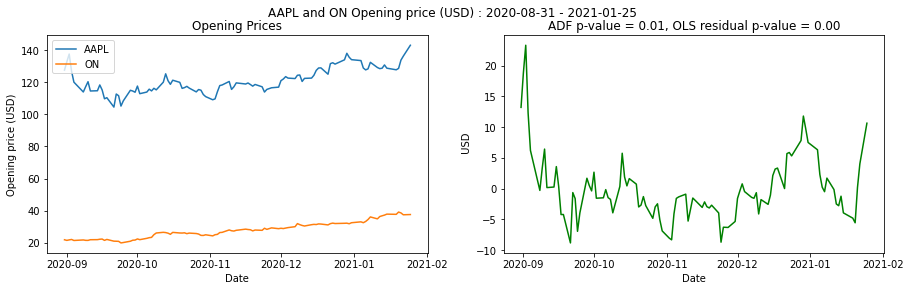

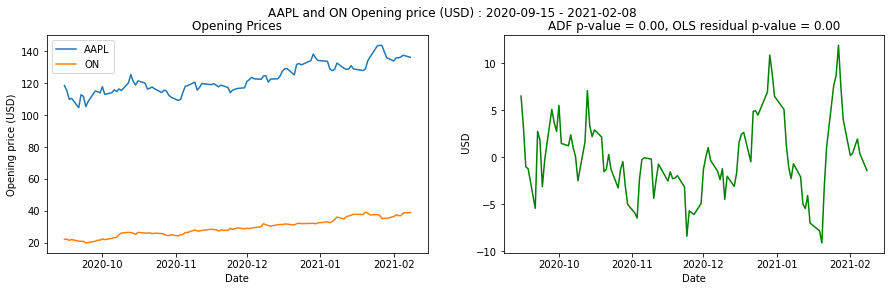

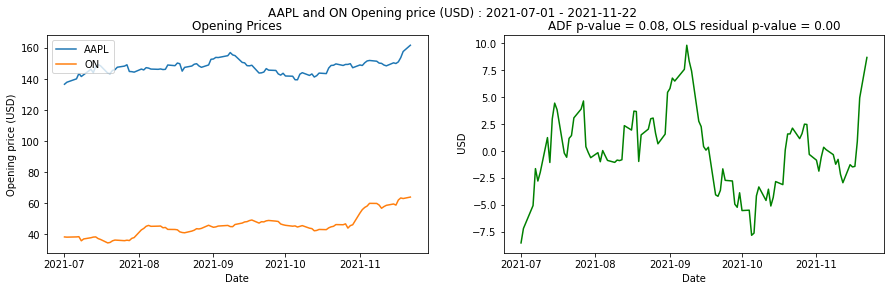

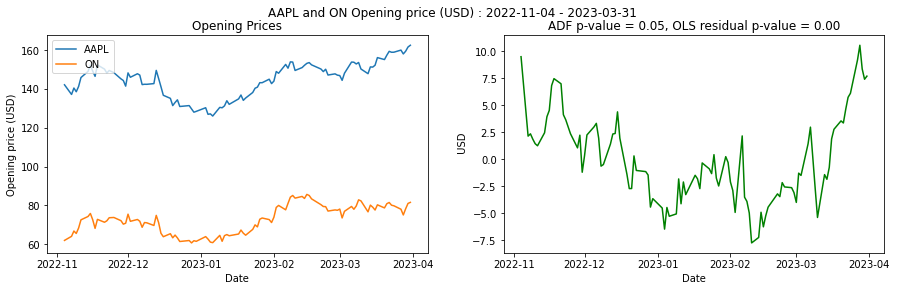

AAPL and TXN


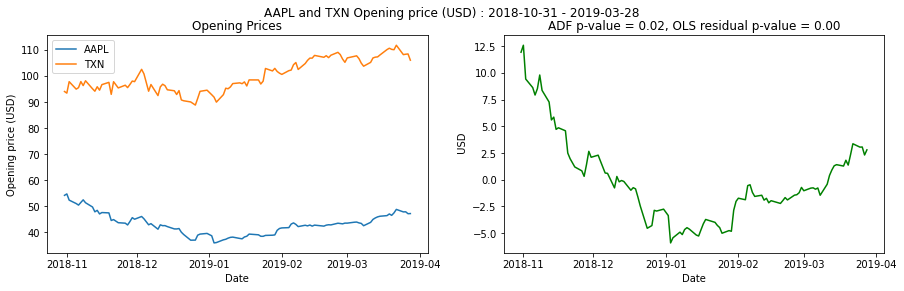

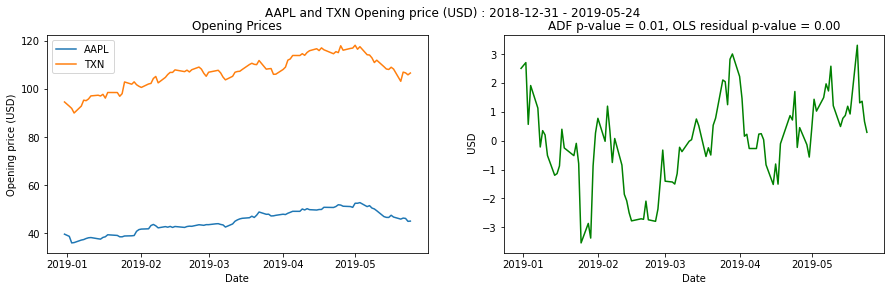

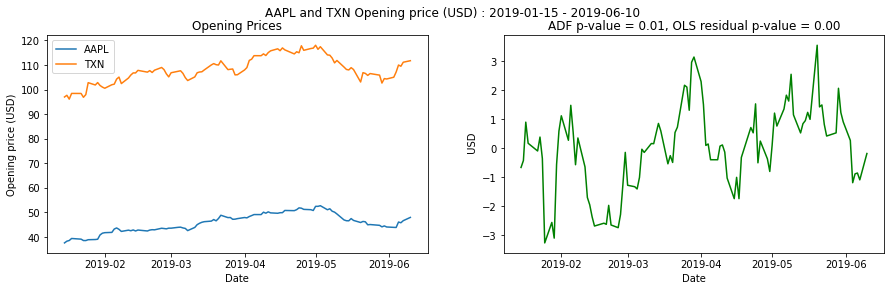

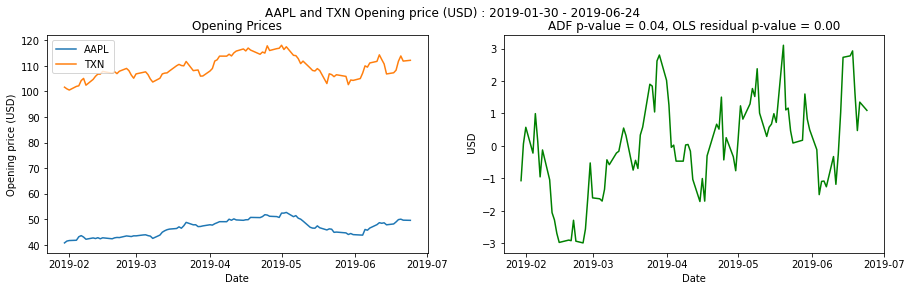

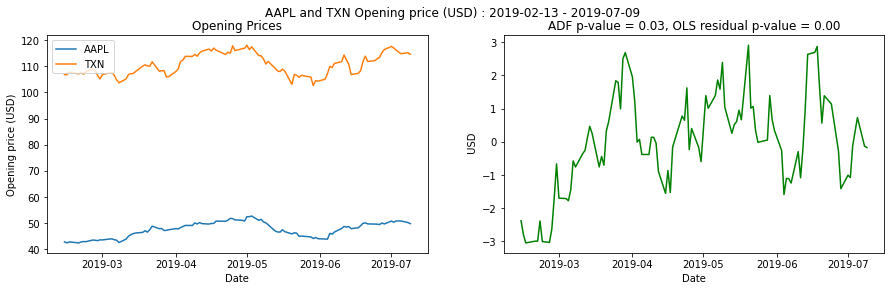

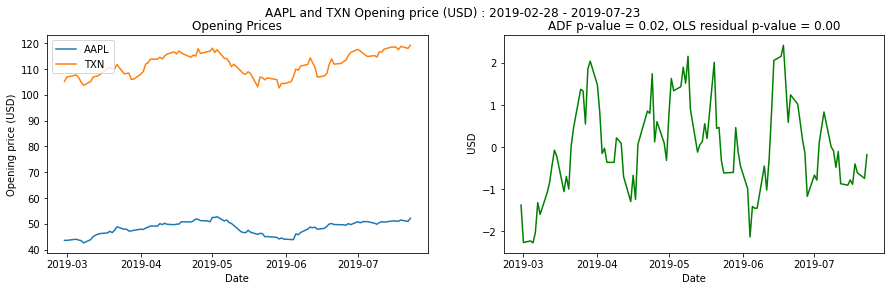

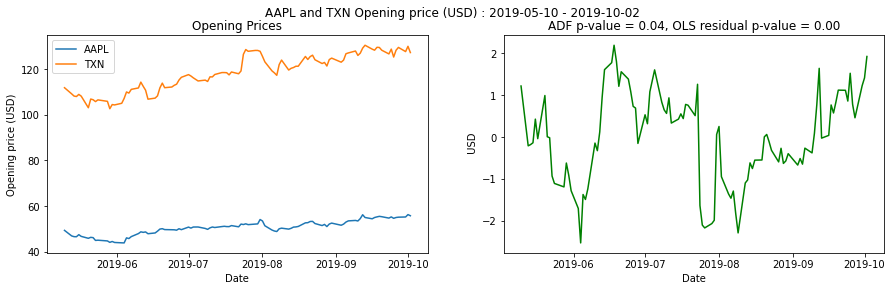

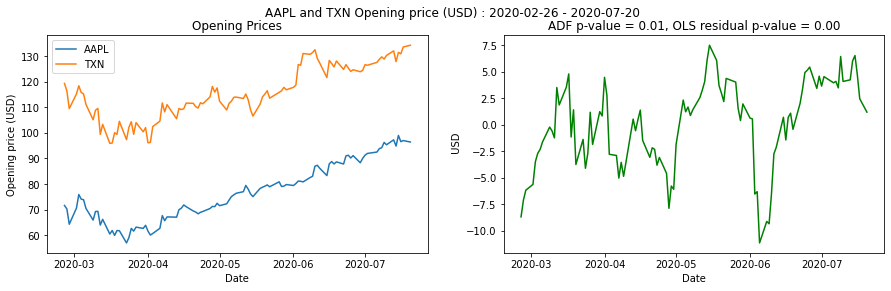

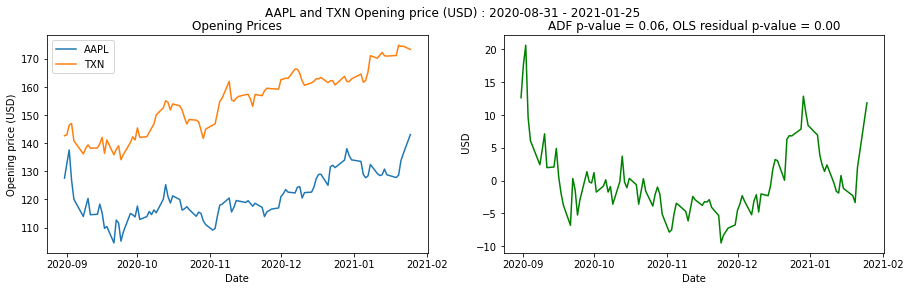

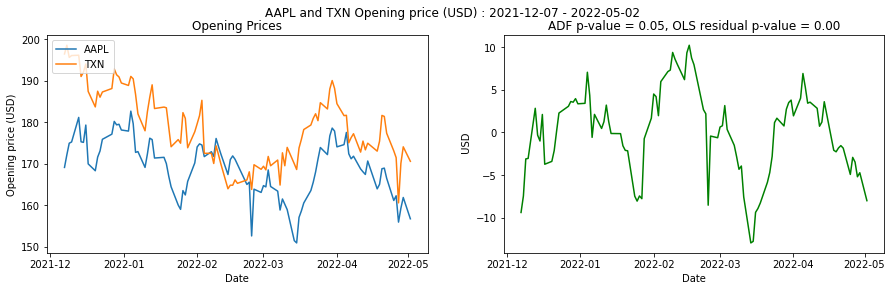

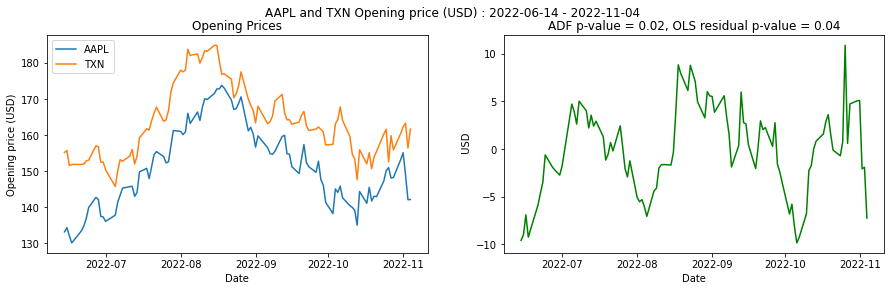

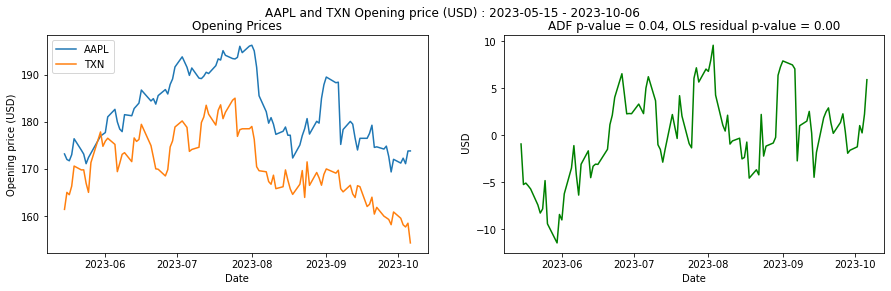

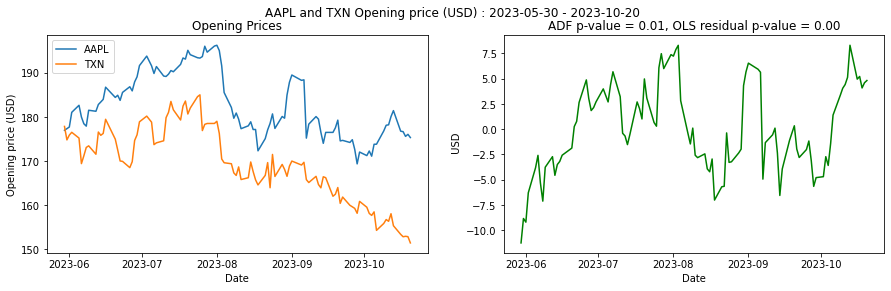

AAPL and AVGO


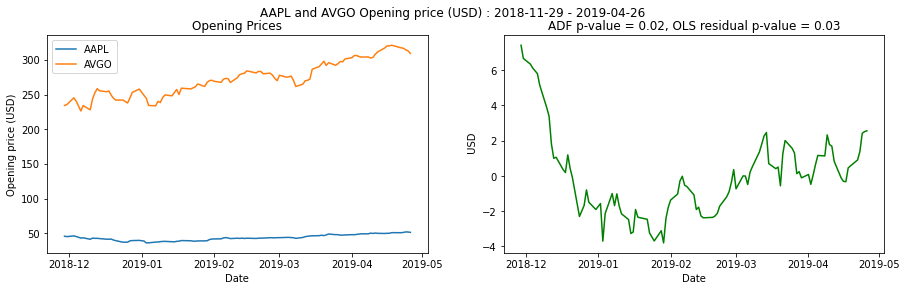

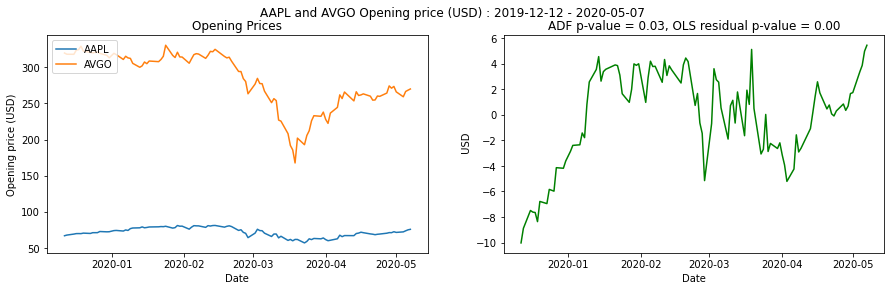

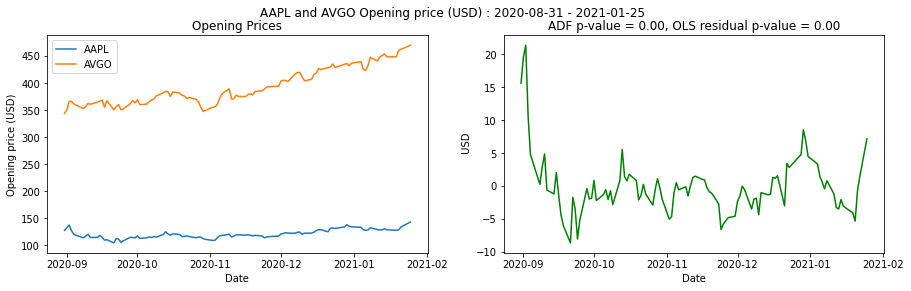

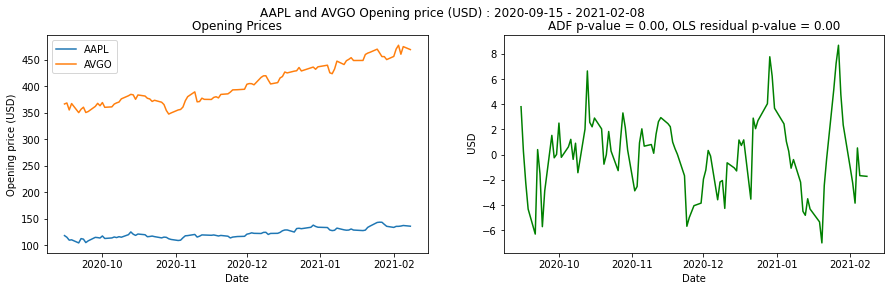

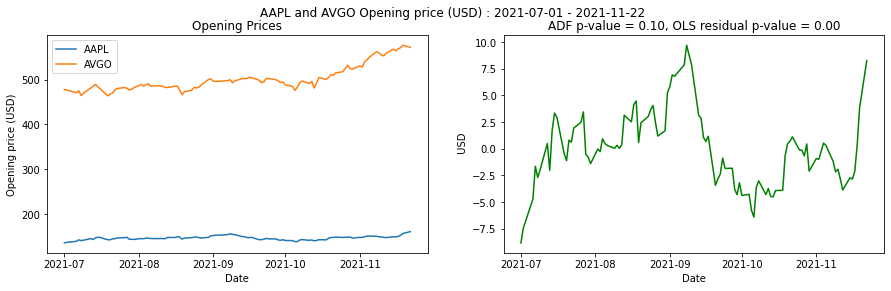

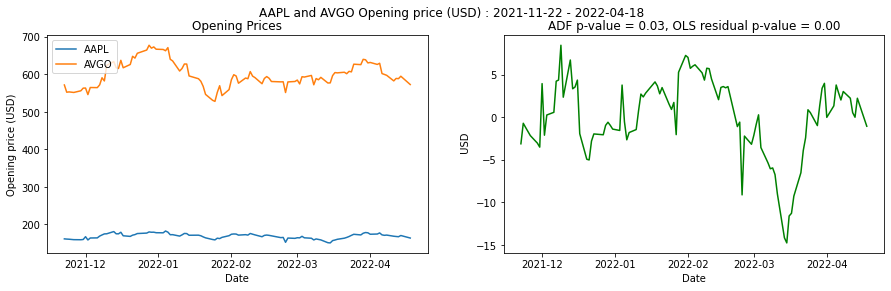

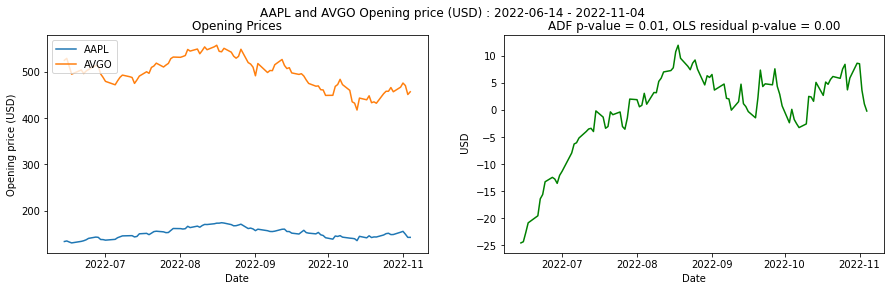

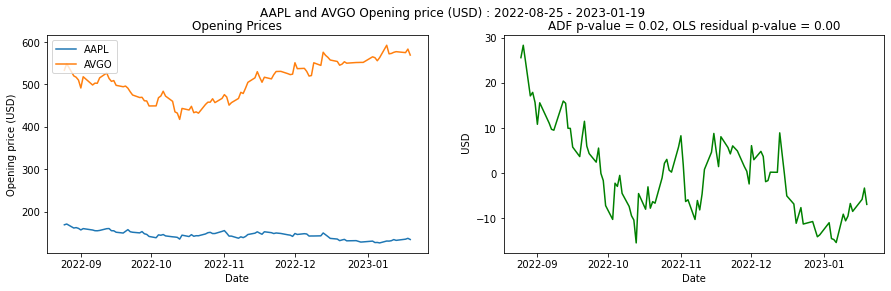

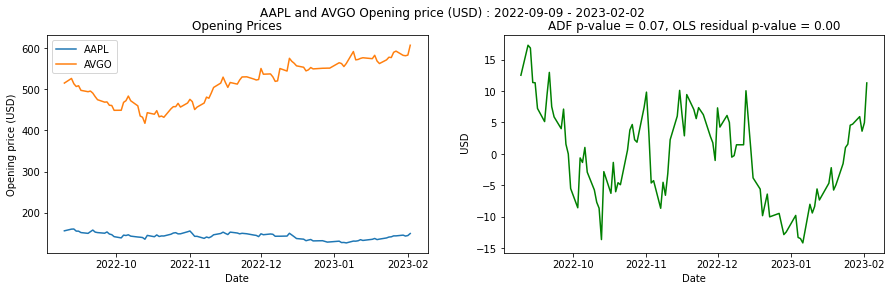

AAPL and JBL


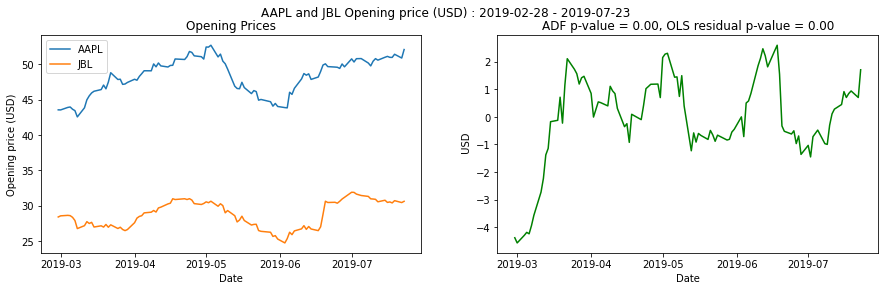

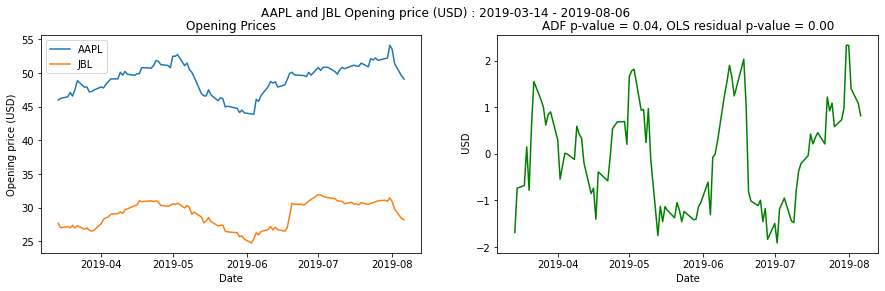

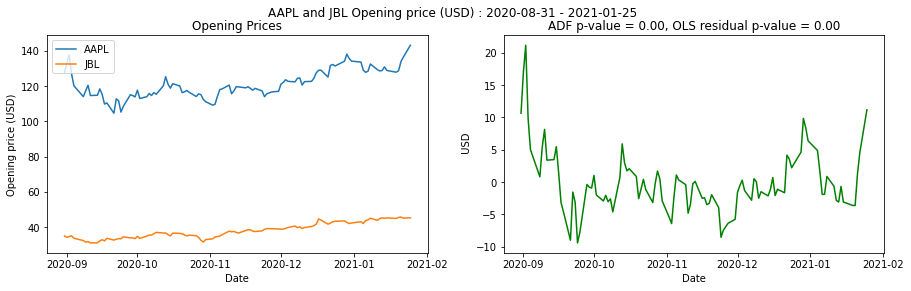

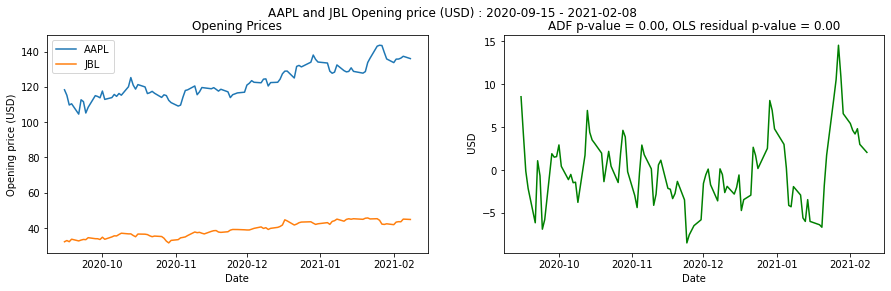

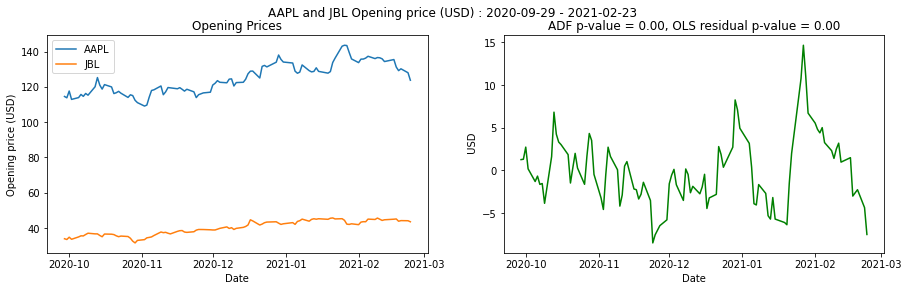

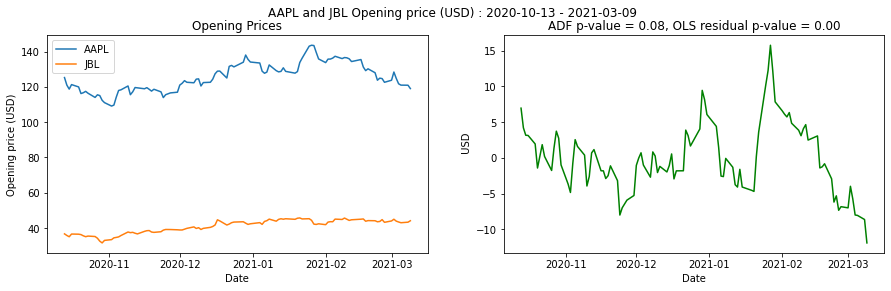

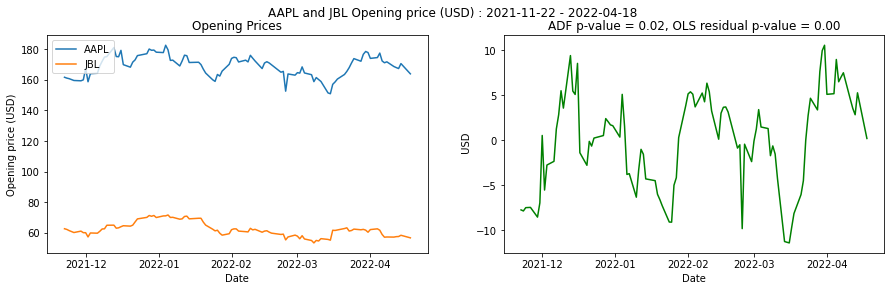

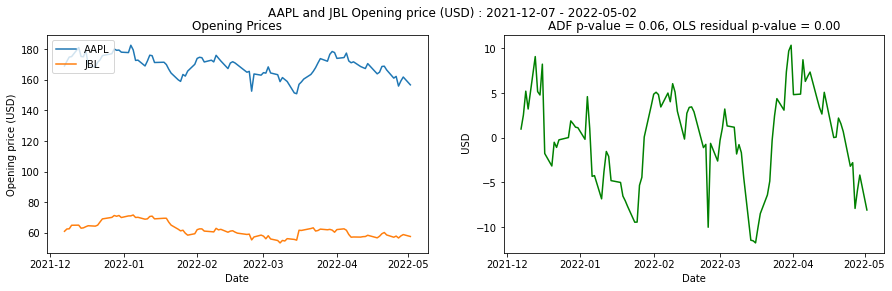

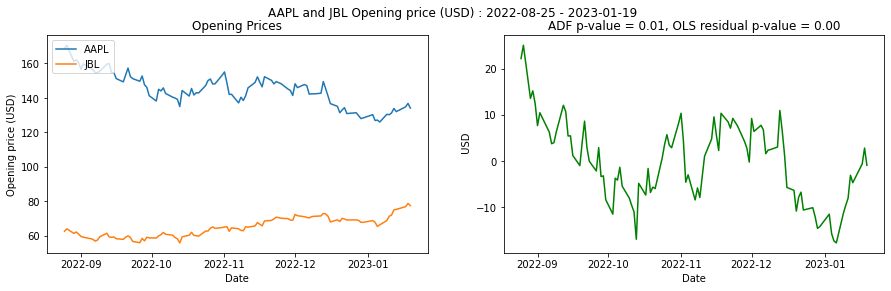

In [17]:
year_month_day_format = '%Y-%m-%d'

for ticker in cointegration['Ticker'].unique():
    print(f"AAPL and {ticker}")
    # Add x-axis and y-axis
    for pvalue, init, final in cointegration.loc[cointegration['Ticker']==ticker][['ADF p-value','Date Initial', 'Date Final']].values: 
        data_AAPL = df_us_open[['AAPL','Date']].loc[(df_us_open['Date']>=init) & (df_us_open['Date']<=final) ]
        data_company = df_us_open[[ticker,'Date']].loc[(df_us_open['Date']>=init) & (df_us_open['Date']<=final) ]
        
        adf_test_stat, adf_pvalue,lags,ols_pvalues,residuals = cointegration_test(data_AAPL['AAPL'],data_company[ticker])
        
        fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(15, 4))
        fig.suptitle(f'AAPL and {ticker} Opening price ({currency}) : {init.strftime(year_month_day_format)} - {final.strftime(year_month_day_format)}')
        # Add x-axis and y-axis
        ax1.plot(data_AAPL['Date'],data_AAPL['AAPL'],label = 'AAPL') 
        ax1.plot(data_company['Date'],data_company[ticker],label=ticker) 
        ax2.plot(data_AAPL['Date'],residuals,color = 'green')
        
        # Set title and labels for axes
        ax1.set(xlabel="Date",
           ylabel=f"Opening price ({currency})",
               title = f'Opening Prices')
        
        ax2.set(xlabel="Date",
           ylabel=f" {currency}",
                title = f'ADF p-value = {adf_pvalue:0.2f}, OLS residual p-value = {ols_pvalues:0.2f}')
        ax1.legend(loc='upper left')
        plt.show()
  

We observe that, within these intervals, both Apple's opening price and the opening prices of the associated companies follow similar trajectories, aligning with our expectations based on cointegration. Additionally, a visual inspection reveals that each set of residuals demonstrates a stationary pattern. The plots showcase several key characteristics associated with cointegrated processes, as anticipated.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Specifically, cointegrated processes exhibit a tendency to move in concert over the long term, displaying parallel movement that reflects a shared long-term trend. The visual representation effectively captures and highlights intervals where the opening prices of the two entities move in a manner suggesting the conservation of a certain quantity. This phenomenon is consistently apparent across all observed time intervals, affirming the efficacy of cointegration in detecting and portraying the preservation of relationships between Apple and the relevant companies.  <br>
&nbsp;&nbsp;&nbsp;&nbsp; It is natural to ask, "for which company does Apple conitegrate most frequently with?". Below we plot a pie graph to visual this relationship.

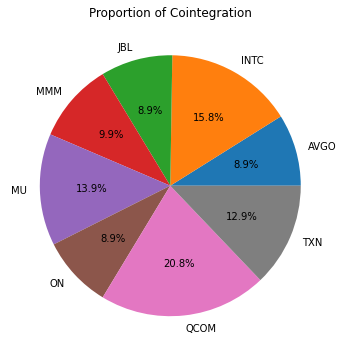

In [18]:
labels = cointegration.groupby('Ticker')['OLS p-value'].count().index.values
sizes = cointegration.groupby('Ticker')['OLS p-value'].count().values

fig, ax = plt.subplots(figsize=(6,6))
plt.title('Proportion of Cointegration')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Of all the cointegraiton to appear, Qualcomm (QCOM) is the most frequently cointegrated, Intel (INTC) is the second most frequently cointegrated, and Micron Semiconductors is the thrid most frequently cointegrated company.

### Granger Causality


&nbsp;&nbsp;&nbsp;&nbsp; The **Granger Causality Test** tests the following hypothesis for two stationary processes $X(t)$ and $Y(t)$:

<p style='text-align: center;'>$H_0:$ $X(t)$ has no "causal" effect $Y(t)$  vs $H_a:$ $X(t)$ has a "causal" effect $Y(t)$ .  </p>

Given the direction of causality in the null hypothesis. We can then preform two Granger causality test in both directions. Namely, we can study if $X(t)$ is causal of $Y(t)$ and if $Y(t)$ is causal of $X(t)$.


To compute these tests we use the module [statsmodels](https://www.statsmodels.org/stable/index.html). Read more about statsmodels Granger Causality Test [here](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html).

**n.b.** "Causal effect" here means that $X(t)$ has predictive power for $Y(t)$. Inparticular, an AR (autoregrssive model) for $Y(t)$ which includes $X(t)$ lag terms, i.e.
$$
Y(t) = \sum_{i=1}^ka_iY(t-i) + \sum_{j=1}^\kappa b_jY(t-j) + \epsilon_t,
$$
is more predictive than an AR without $X(t)$ lag terms, i.e.
$$
Y(t) = \sum_{i=1}^T\alpha_iY(t-i) + \epsilon_t.
$$
Hence Granger causality identifies statistical relationships between variables but does not establish a true causal relationship. The presence of Granger causality does not imply a cause-and-effect relationship; it merely suggests that past values of one variable contain information that helps predict another. For more information on Granger Causality click [here](https://en.wikipedia.org/wiki/Granger_causality).

&nbsp;&nbsp;&nbsp;&nbsp; As Granger causality necessitates stationarity, we focus on the daily returns of the stock prices, expressed as:
$$
r(t) = X(t)-X(t-1)
$$
where in our use $X(t)$ is given by the opening price. To compute this we make use of the `diff()` method. Subsequently, we visualize the daily returns and assess stationarity through both the Augmented Dickey-Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests at a significance level of $\alpha = 0.05$.

In [19]:
# Compute returns
df_returns = df_us_open.diff()
df_returns['Date'] = df_us_open['Date'][1:]
df_returns.dropna(inplace=True)
display(df_returns.head(10))

Date      AAPL       MMM      AVGO      QCOM      INTC       JBL  \
1  2018-01-03  0.592499 -0.709991  7.520020  0.840004 -0.910000  0.299999   
2  2018-01-04  0.002499  1.929993  4.299988  0.959999 -1.950001  0.420000   
3  2018-01-05  0.225002  1.649994  0.380005 -0.139999  0.910000  0.270000   
4  2018-01-08  0.227501  0.730011 -1.049988  0.209999 -0.160000 -0.309999   
5  2018-01-09  0.049999  0.220001  2.139984 -0.610001  0.430000 -0.050001   
6  2018-01-10 -0.347500  1.399994 -7.079987 -0.159996 -1.369999 -0.330000   
7  2018-01-11  0.357498 -0.259995 -2.410004 -0.280006 -0.530003  0.200001   
8  2018-01-12  0.397499  2.330002 -0.179993  0.410004  0.650002  0.400000   
9  2018-01-16  0.430000  2.229996  1.789978  0.620003  0.099998  0.470001   
10 2018-01-17 -0.437500  1.550003  0.300018  2.289993  0.000000 -0.140001   

          ON        MU       TXN  
1   0.969999  2.959999  0.769997  
2   1.170000  1.490002  2.600006  
3  -0.320000  0.139999  0.219994  
4   0.000000 -0.820000 -0.149994  
5   0.029999 -0.040001  1.070000  
6  -0.240000 -3.320000  0.229996  
7   0.160000  1.570000  0.200005  
8   0.330000 -0.700001  0.689995  
9   0.690001  0.320000  2.810005  
10 -0.199999  0.070000  0.399994

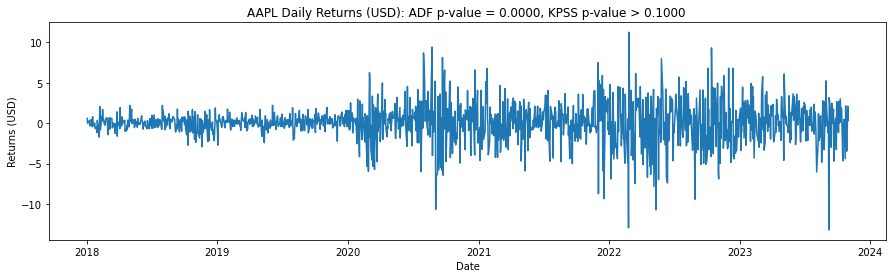

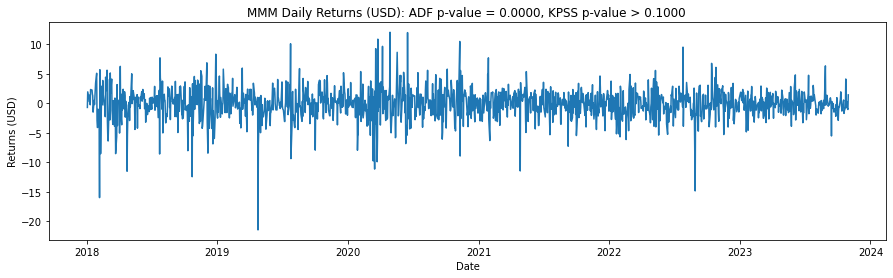

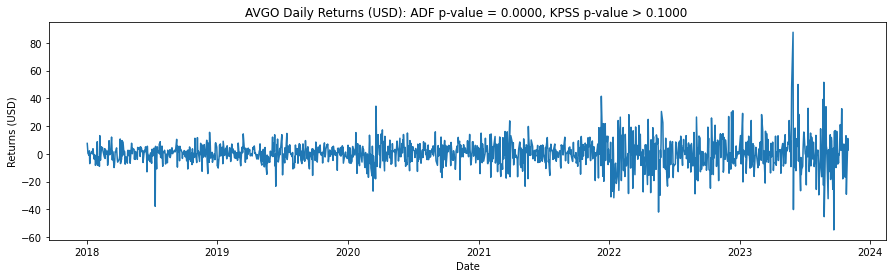

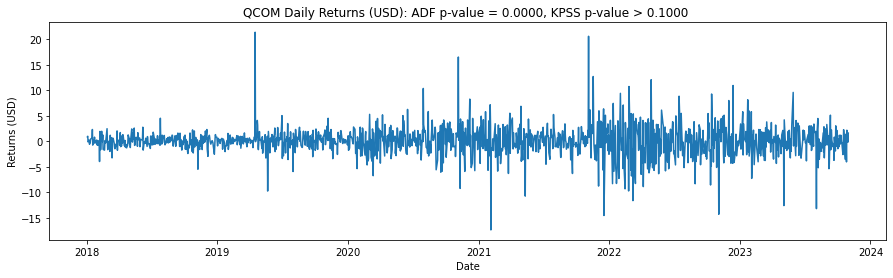

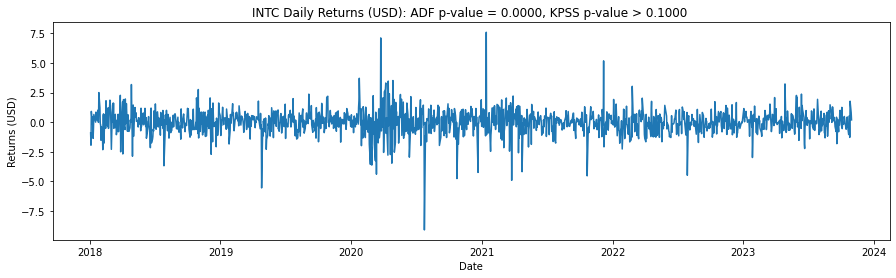

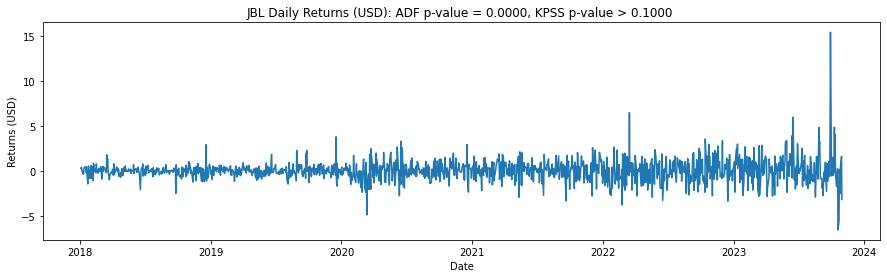

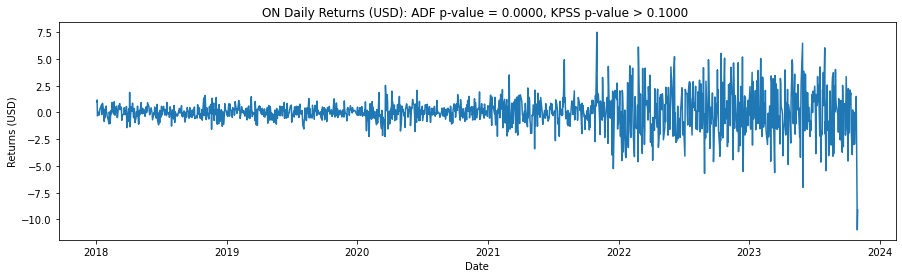

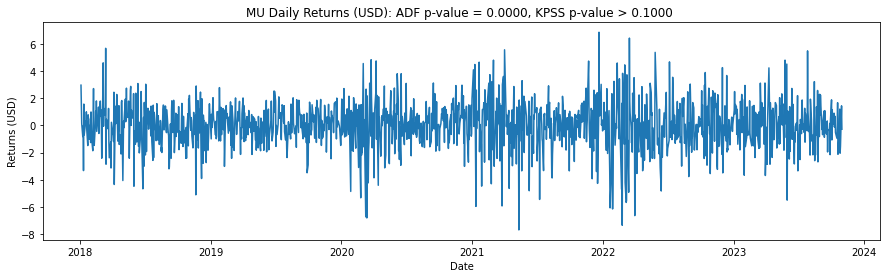

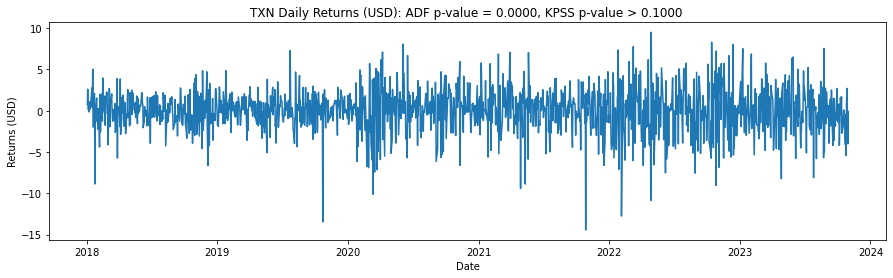

In [20]:
df_returns_test_statistics = pd.DataFrame(columns=['Ticker','Currency','ADF Test Statistic','ADF p-value','KPSS Test Statistic','KPSS p-value'])

for ticker in tickers:
    currency = yf.Ticker(ticker).basic_info['currency']
    
    data =  df_returns[ticker]
    adf = adfuller(data,regression='ctt')
    adf_test_stat = adf[0]
    adf_pvalue = adf[1]
    
    # We ignore warnings here as we encounter a minor warning when computing the kpss test statistic.
    # The p-values are returned are larger than the actual p-values
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        kp=kpss(data, regression='ct', nlags='auto', store=False)
    
    kpss_test_stat= kp[0]
    kpss_pvalue= kp[1]
    row = [ticker,currency,adf_test_stat,adf_pvalue,kpss_test_stat,kpss_pvalue]
    df_returns_test_statistics.loc[len(df_returns_test_statistics.index)] = row
    
    
    fig, ax = plt.subplots(figsize=(15, 4))

    # Add x-axis and y-axis
    ax.plot(df_returns['Date'],data,label = ticker) 
    ax.set(xlabel="Date",
       ylabel=f"Returns ({currency})",
       title=f"{ticker} Daily Returns ({currency}): ADF p-value = {adf_pvalue:0.4f}, KPSS p-value > {kpss_pvalue:0.4f} ")
    plt.show()
    

In [21]:
display(df_returns_test_statistics)

Ticker Currency  ADF Test Statistic   ADF p-value  KPSS Test Statistic  \
0   AAPL      USD          -24.054793  0.000000e+00             0.058154   
1    MMM      USD          -38.489083  0.000000e+00             0.058508   
2   AVGO      USD          -23.997896  0.000000e+00             0.035662   
3   QCOM      USD          -40.647140  0.000000e+00             0.062393   
4   INTC      USD          -39.527492  0.000000e+00             0.033411   
5    JBL      USD          -11.070288  1.635171e-17             0.042563   
6     ON      USD          -22.898626  0.000000e+00             0.068764   
7     MU      USD          -40.415442  0.000000e+00             0.044016   
8    TXN      USD           -9.316671  2.003499e-13             0.082046   

   KPSS p-value  
0           0.1  
1           0.1  
2           0.1  
3           0.1  
4           0.1  
5           0.1  
6           0.1  
7           0.1  
8           0.1

We see that for a significance level $\alpha = 0.05$ we reject the null hypothesis that the process is non-stationary with the ADF test. In addition, we faill to reject the null hypothesis that the process is stationary with the KPSS test. Note that the suppressed warning returned by the KPSS test reads.
```InterpolationWarning: The test statistic is outside of the range of p-values available in the look-up table. The actual p-value is larger than the p-value returned.``` Namely, for any reasonable siginificance level ($\alpha < 0.1$) we fail to reject the null hypothesis that these processes are stationary. The conclusions of the ADF and KPSS test suggest that it overwhelmingly the case that the daily return prices are stationary.

&nbsp;&nbsp;&nbsp;&nbsp; We proceed to conduct Granger causality tests on daily return prices, setting a significance level of $\alpha = 0.05$. This analysis is focused on the intervals where statistically significant cointegration was identified in the preceding section.

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

df_us_gc_window = pd.DataFrame(columns=['Ticker',
                                        'Causes APPL p-value',
                                        'Caused by APPL p-value',
                                        'Lags',
                                        'Date Initial',
                                        'Date Final'])

for ticker in cointegration['Ticker'].unique():
    for pvalue,lags, init, final in cointegration.loc[cointegration['Ticker']==ticker][['ADF p-value','ADF lags','Date Initial', 'Date Final']].values: 
        data = df_returns.loc[(df_returns['Date']>=init) & (df_returns['Date']<=final) ]  
        if lags == 0:
            lags = 1
        gc_appl = grangercausalitytests(data[['AAPL',ticker]],[lags],verbose=0)
        gc_reverse = grangercausalitytests(data[[ticker,'AAPL']],[lags],verbose=0)
        
        gc_appl_pval = gc_appl[lags][0]['ssr_ftest'][1]

        gc_reverse_pval  = gc_reverse[lags][0]['ssr_ftest'][1] 
        
        row = [ticker, gc_appl_pval, gc_reverse_pval, lags, init, final]
        df_us_gc_window.loc[len(df_us_gc_window.index)] = row

In [23]:
sig_level = 0.05
granger_causal = df_us_gc_window.loc[(df_us_gc_window['Causes APPL p-value']<=sig_level) |(df_us_gc_window['Caused by APPL p-value']<=sig_level) ]
display(granger_causal)

Ticker  Causes APPL p-value  Caused by APPL p-value  Lags Date Initial  \
2     MMM             0.009836                0.753616     2   2020-06-05   
3     MMM             0.001160                0.553449     2   2020-06-19   
4     MMM             0.002656                0.817434     1   2020-07-06   
10   INTC             0.000642                0.619469     4   2018-01-02   
11   INTC             0.000398                0.574127     4   2018-01-17   
16   INTC             0.041673                0.612530     1   2020-05-07   
17   INTC             0.023388                0.476121     1   2020-05-21   
19   INTC             0.710985                0.027943     1   2021-05-05   
20   INTC             0.520116                0.001845     1   2021-05-19   
21   INTC             0.298405                0.036699     1   2021-06-03   
22   INTC             0.313093                0.025478     1   2021-06-17   
23   INTC             0.630204                0.041188     1   2021-07-01   
44   QCOM             0.004212                0.255364     2   2020-03-11   
45   QCOM             0.035551                0.019136    10   2020-03-25   
68     ON             0.653179                0.015177     1   2021-07-01   
70    TXN             0.096404                0.043111     1   2018-10-31   
77    TXN             0.361806                0.029492     2   2020-02-26   
78    TXN             0.116396                0.027037     2   2020-08-31   
85   AVGO             0.056901                0.049425     1   2020-08-31   
87   AVGO             0.224915                0.026129     1   2021-07-01   
94    JBL             0.019433                0.797538     2   2020-08-31   
95    JBL             0.220003                0.029584     1   2020-09-15   

   Date Final  
2  2020-10-27  
3  2020-11-10  
4  2020-11-24  
10 2018-05-25  
11 2018-06-11  
16 2020-09-29  
17 2020-10-13  
19 2021-09-27  
20 2021-10-11  
21 2021-10-25  
22 2021-11-08  
23 2021-11-22  
44 2020-08-03  
45 2020-08-17  
68 2021-11-22  
70 2019-03-28  
77 2020-07-20  
78 2021-01-25  
85 2021-01-25  
87 2021-11-22  
94 2021-01-25  
95 2021-02-08

We now plot the daily returns and opening prices for the cointegraiton intervals where granger causality is statistically significant.

AAPL and MMM


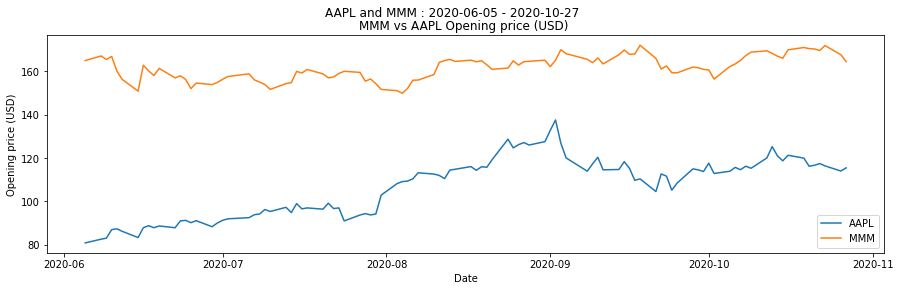

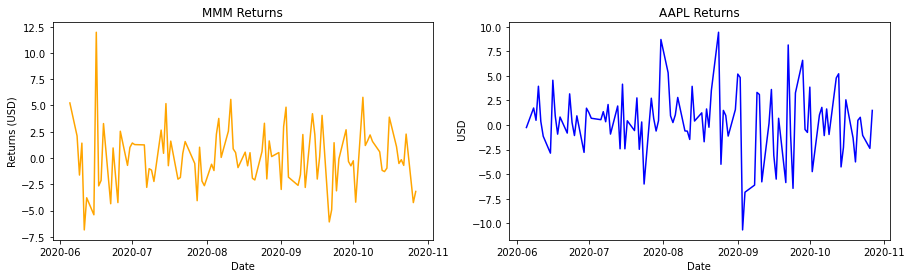

MMM does not cause AAPL: granger causality p-value: 0.01
AAPL does not cause  MMM granger causality p-value: 0.75


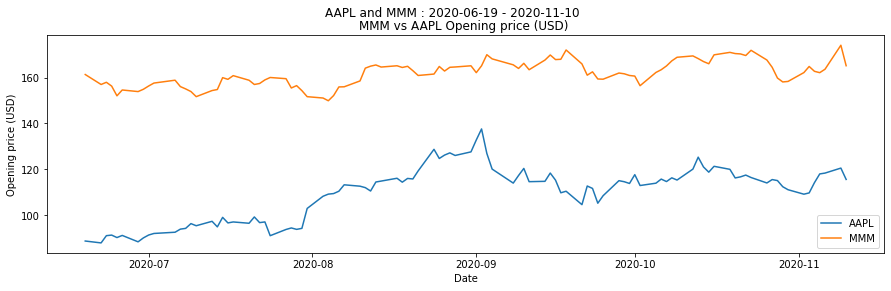

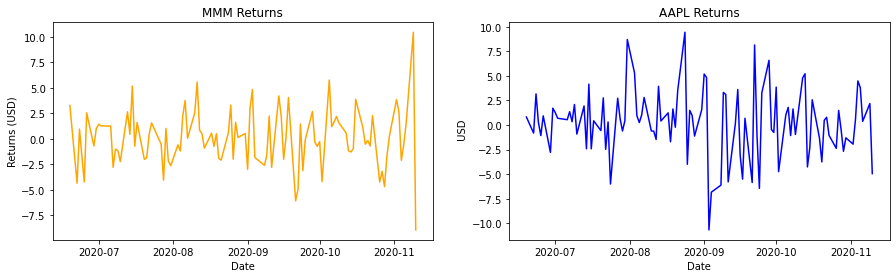

MMM does not cause AAPL: granger causality p-value: 0.00
AAPL does not cause  MMM granger causality p-value: 0.55


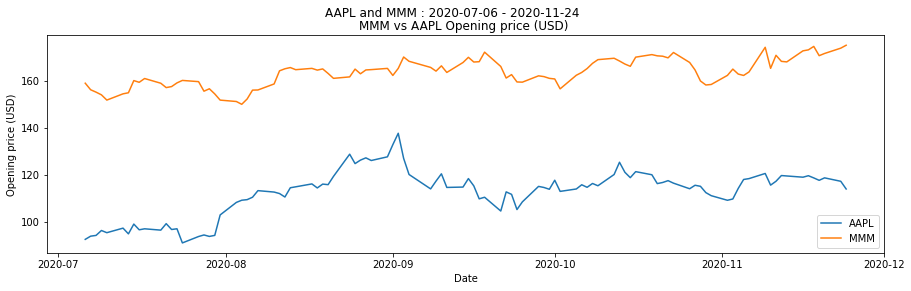

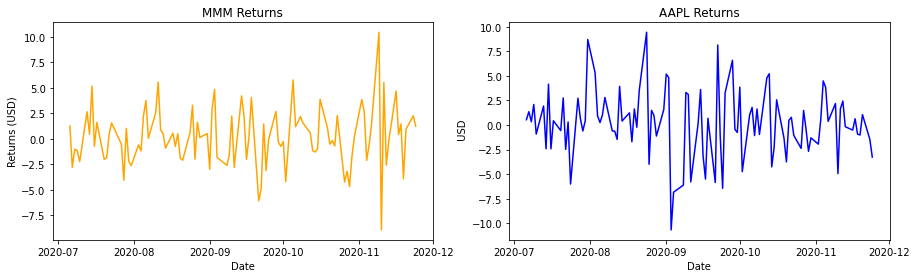

MMM does not cause AAPL: granger causality p-value: 0.00
AAPL does not cause  MMM granger causality p-value: 0.82
AAPL and INTC


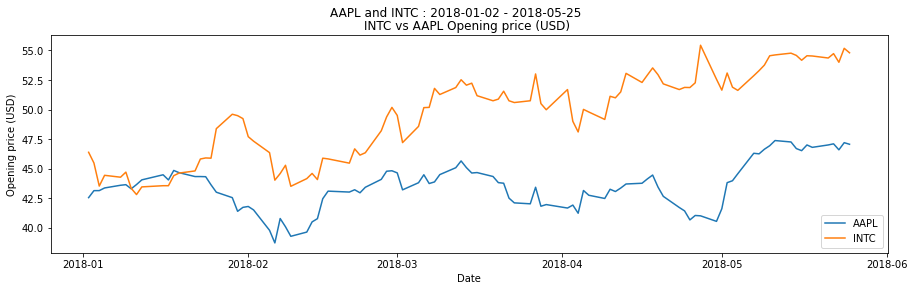

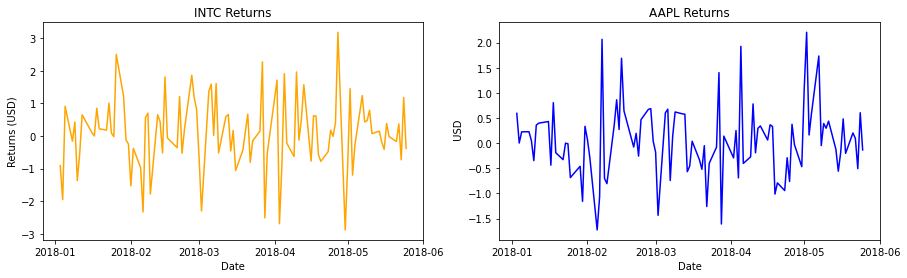

INTC does not cause AAPL: granger causality p-value: 0.00
AAPL does not cause  INTC granger causality p-value: 0.62


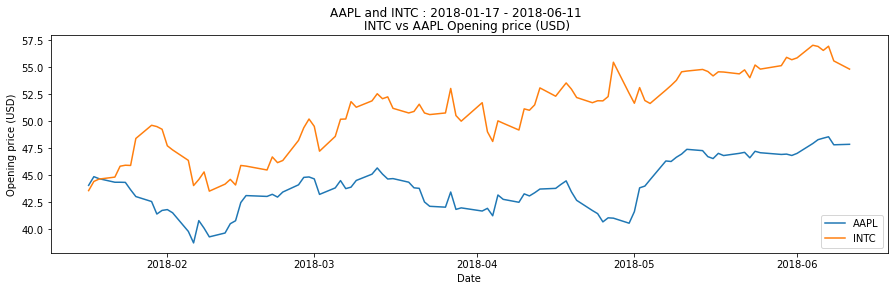

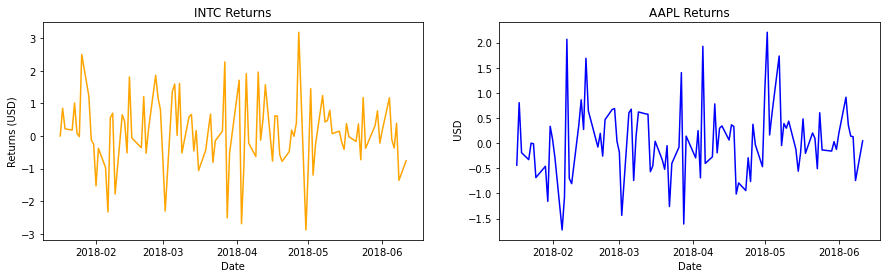

INTC does not cause AAPL: granger causality p-value: 0.00
AAPL does not cause  INTC granger causality p-value: 0.57


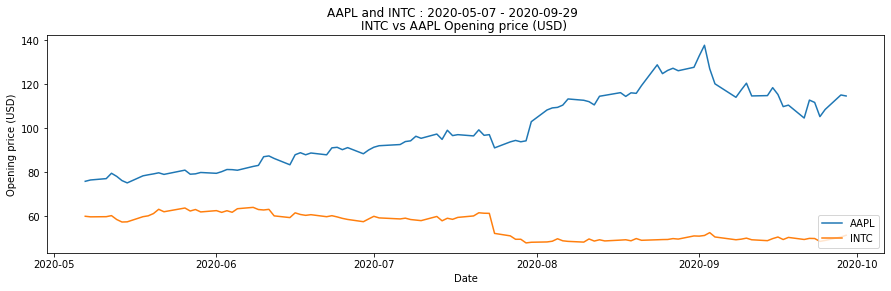

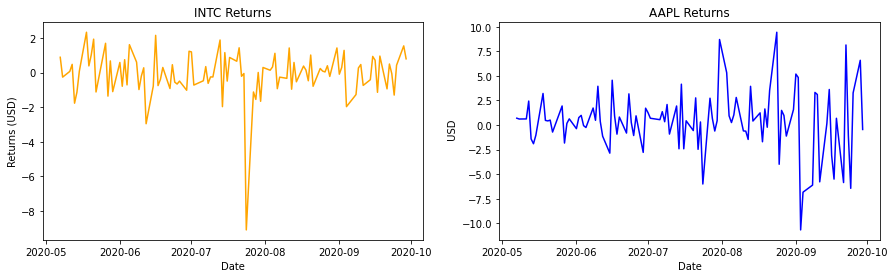

INTC does not cause AAPL: granger causality p-value: 0.04
AAPL does not cause  INTC granger causality p-value: 0.61


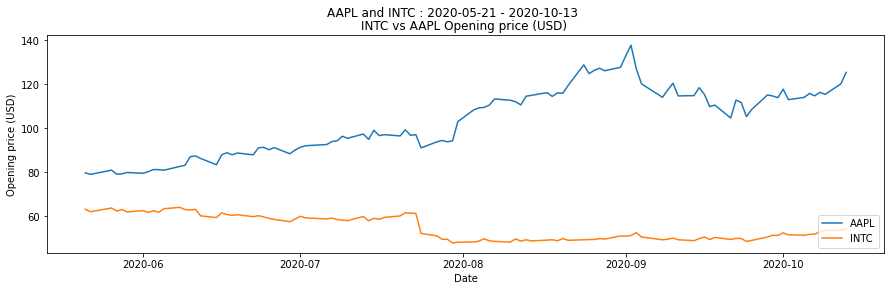

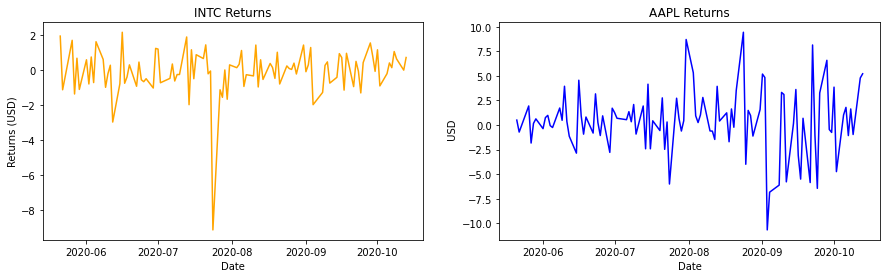

INTC does not cause AAPL: granger causality p-value: 0.02
AAPL does not cause  INTC granger causality p-value: 0.48


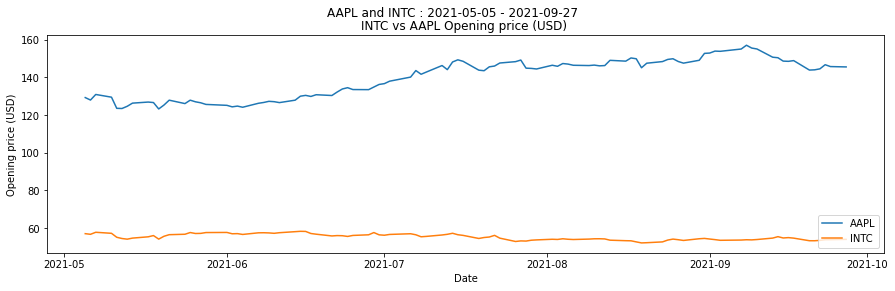

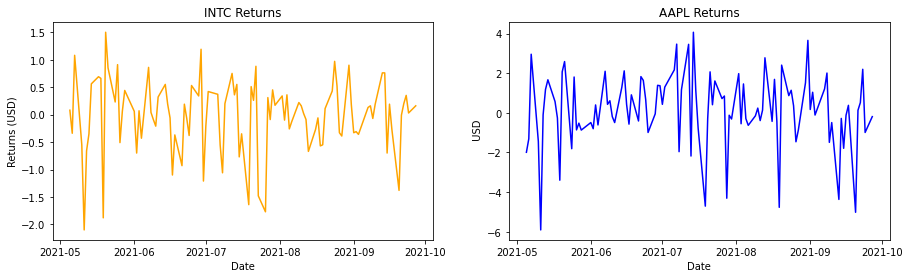

INTC does not cause AAPL: granger causality p-value: 0.71
AAPL does not cause  INTC granger causality p-value: 0.03


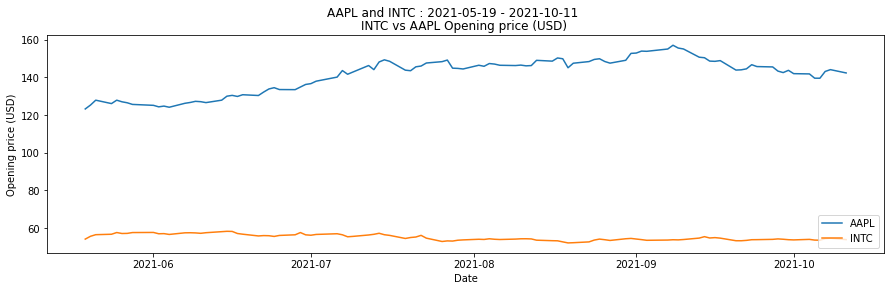

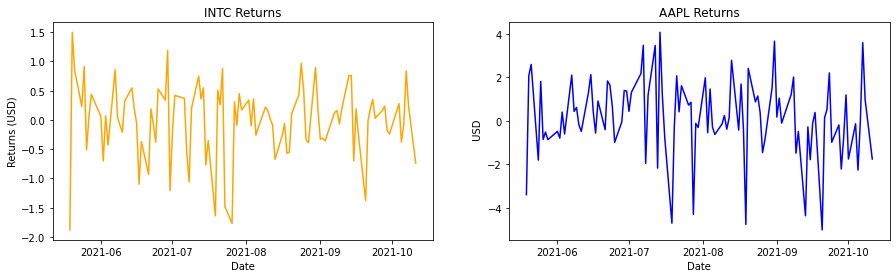

INTC does not cause AAPL: granger causality p-value: 0.52
AAPL does not cause  INTC granger causality p-value: 0.00


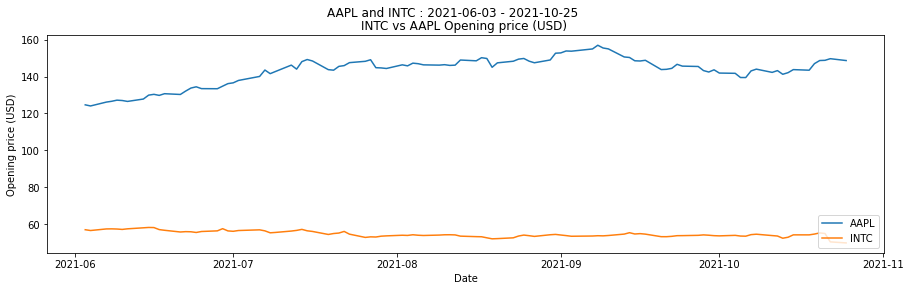

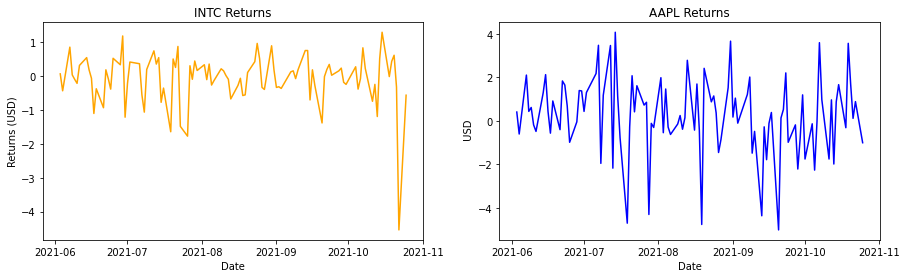

INTC does not cause AAPL: granger causality p-value: 0.30
AAPL does not cause  INTC granger causality p-value: 0.04


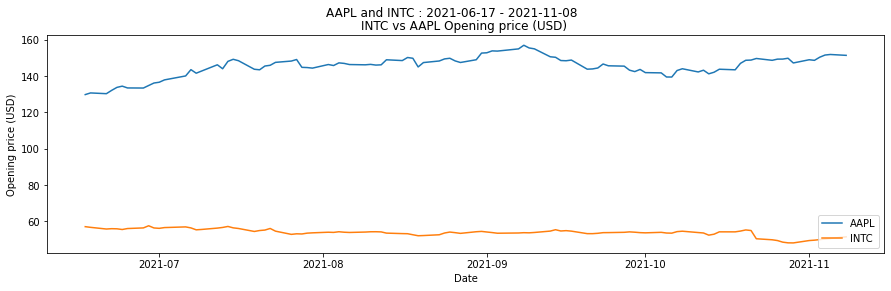

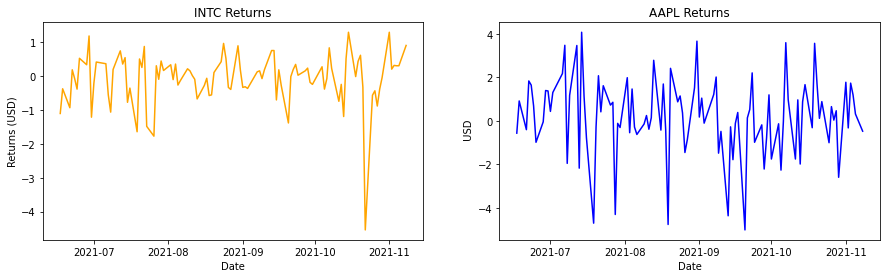

INTC does not cause AAPL: granger causality p-value: 0.31
AAPL does not cause  INTC granger causality p-value: 0.03


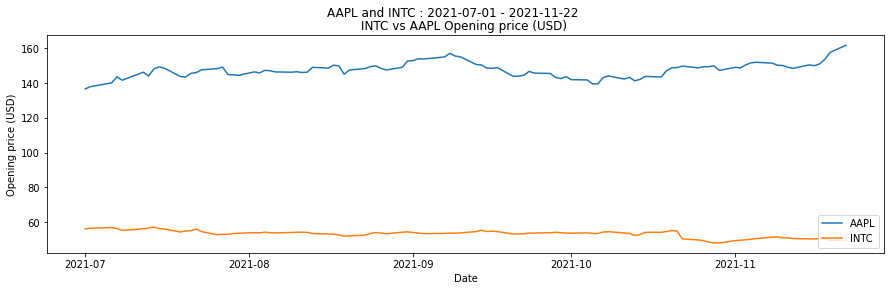

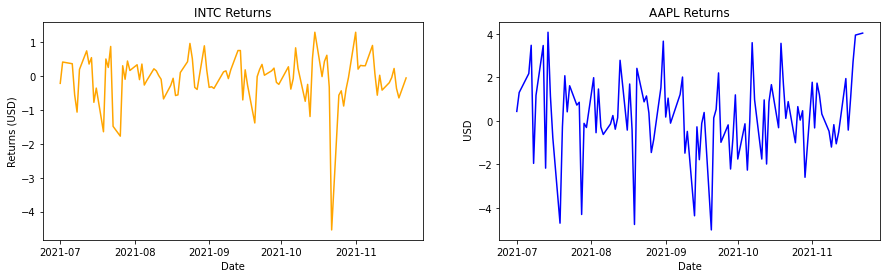

INTC does not cause AAPL: granger causality p-value: 0.63
AAPL does not cause  INTC granger causality p-value: 0.04
AAPL and QCOM


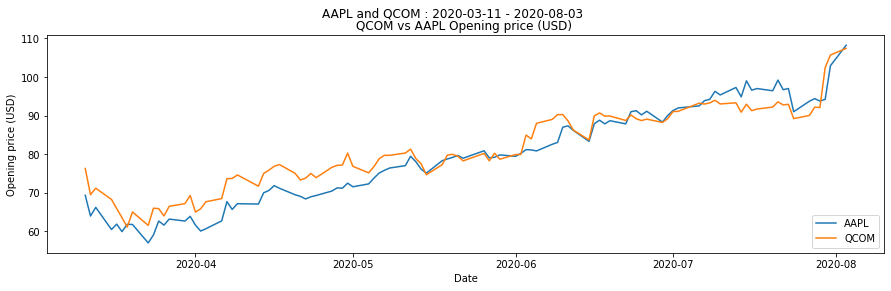

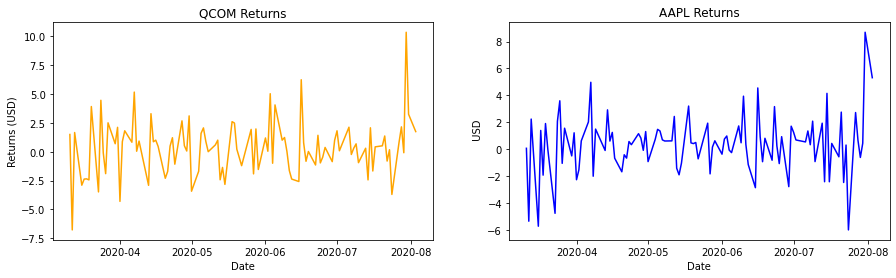

QCOM does not cause AAPL: granger causality p-value: 0.00
AAPL does not cause  QCOM granger causality p-value: 0.26


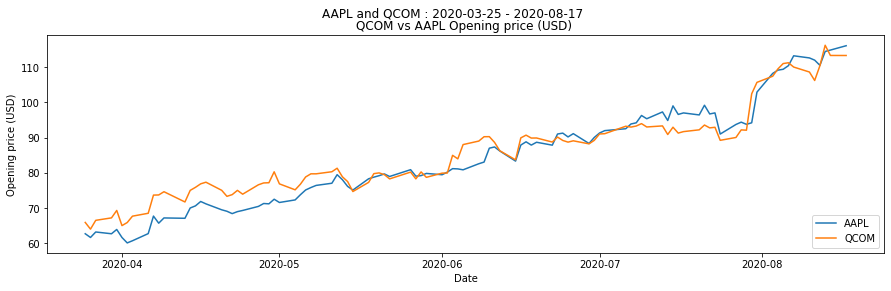

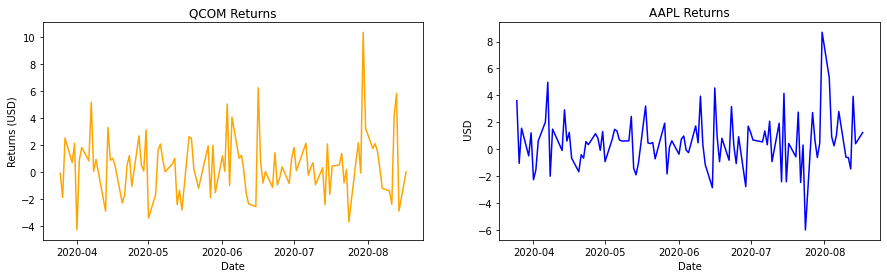

QCOM does not cause AAPL: granger causality p-value: 0.04
AAPL does not cause  QCOM granger causality p-value: 0.02
AAPL and ON


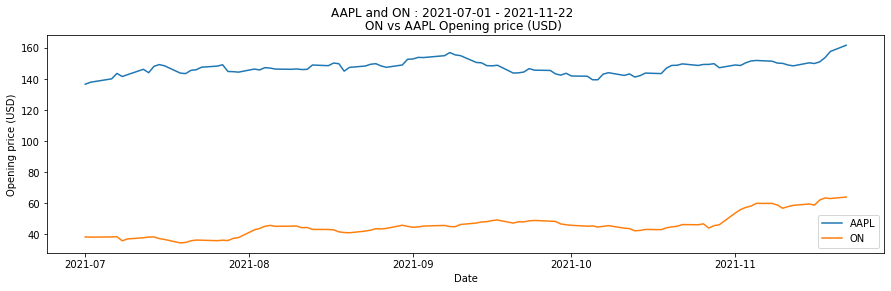

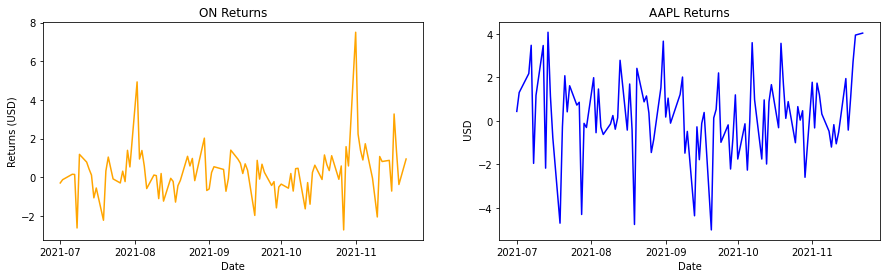

ON does not cause AAPL: granger causality p-value: 0.65
AAPL does not cause  ON granger causality p-value: 0.02
AAPL and TXN


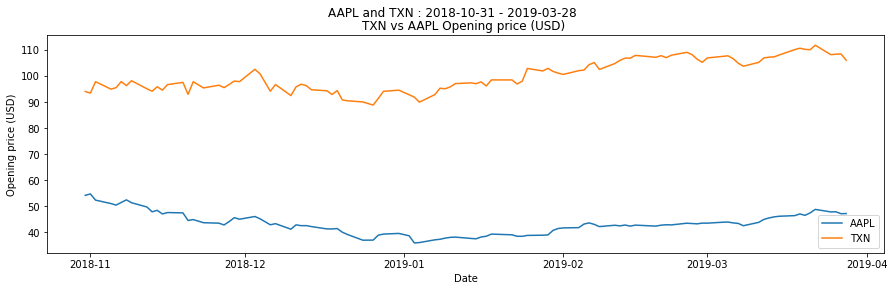

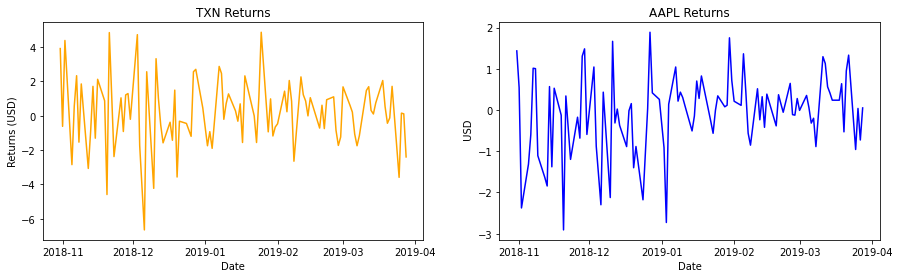

TXN does not cause AAPL: granger causality p-value: 0.10
AAPL does not cause  TXN granger causality p-value: 0.04


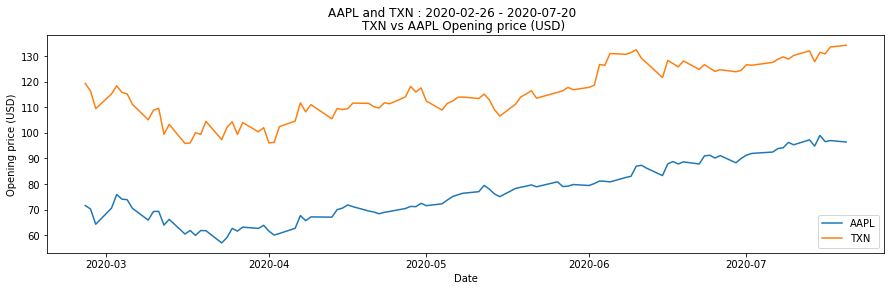

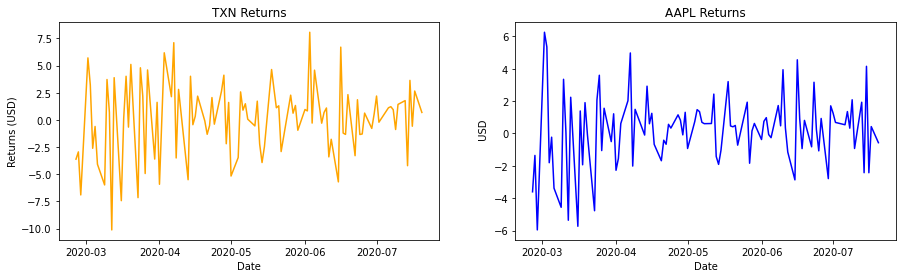

TXN does not cause AAPL: granger causality p-value: 0.36
AAPL does not cause  TXN granger causality p-value: 0.03


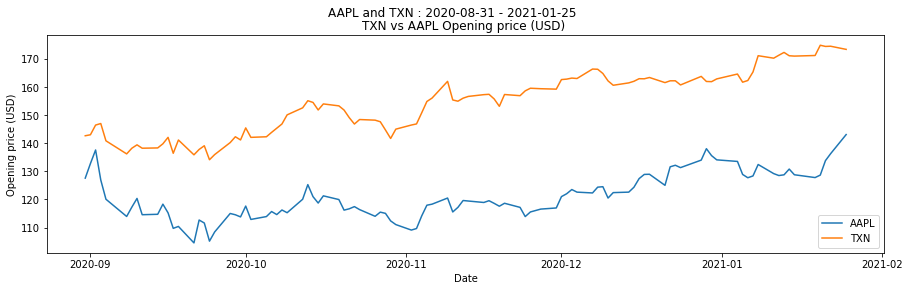

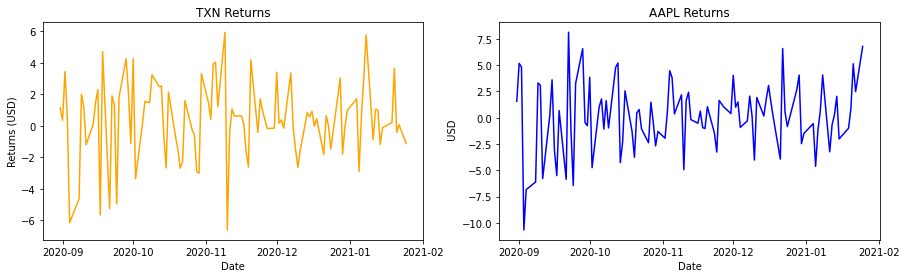

TXN does not cause AAPL: granger causality p-value: 0.12
AAPL does not cause  TXN granger causality p-value: 0.03
AAPL and AVGO


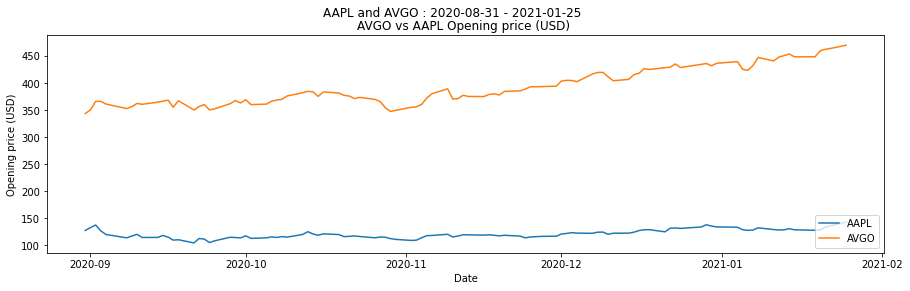

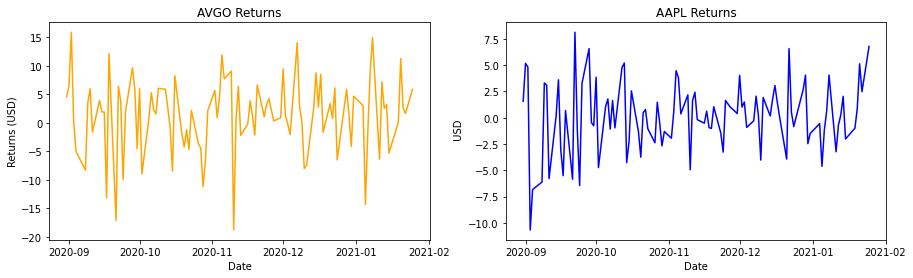

AVGO does not cause AAPL: granger causality p-value: 0.06
AAPL does not cause  AVGO granger causality p-value: 0.05


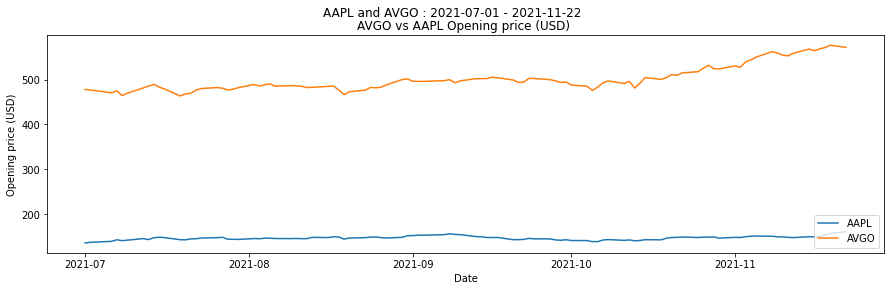

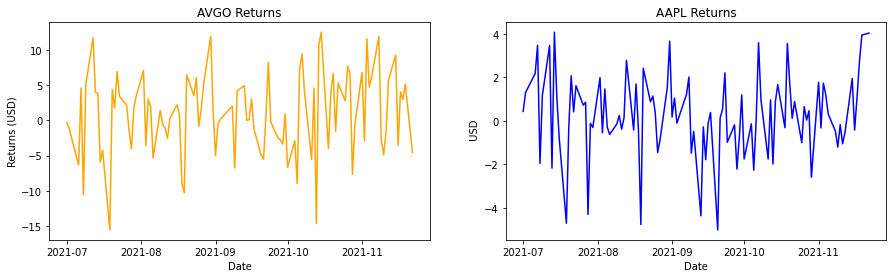

AVGO does not cause AAPL: granger causality p-value: 0.22
AAPL does not cause  AVGO granger causality p-value: 0.03
AAPL and JBL


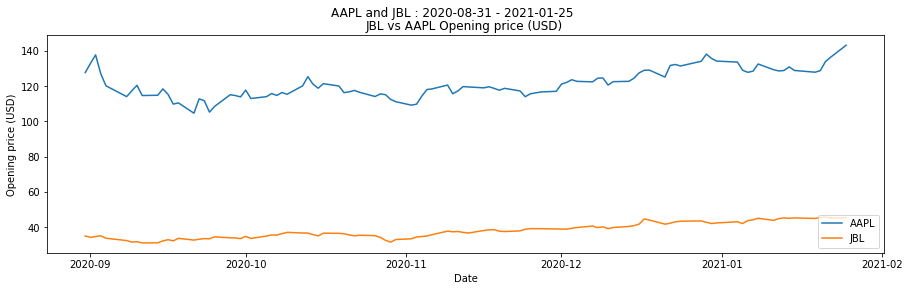

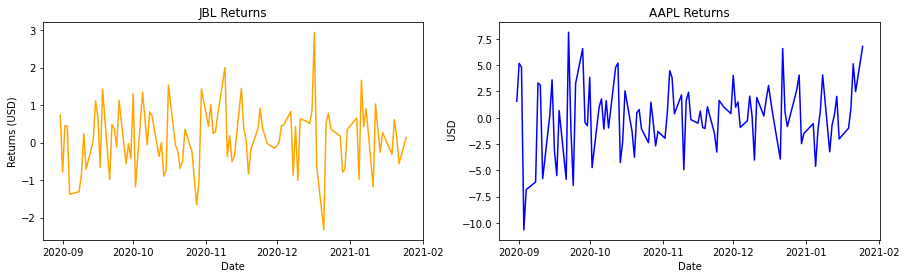

JBL does not cause AAPL: granger causality p-value: 0.02
AAPL does not cause  JBL granger causality p-value: 0.80


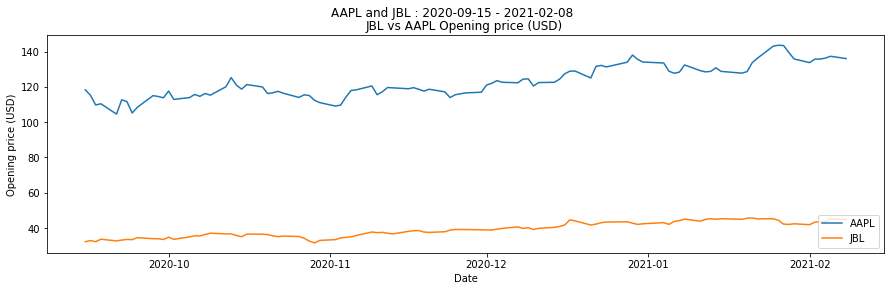

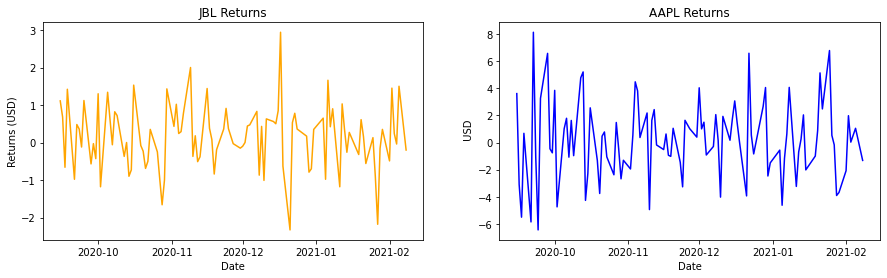

JBL does not cause AAPL: granger causality p-value: 0.22
AAPL does not cause  JBL granger causality p-value: 0.03


In [24]:
year_month_day_format = '%Y-%m-%d'

for ticker in granger_causal['Ticker'].unique():
    print(f"AAPL and {ticker}")
    # Add x-axis and y-axis
    for causes_pvalue, causedby_pvalue, init, final in granger_causal.loc[granger_causal['Ticker']==ticker][['Causes APPL p-value', 'Caused by APPL p-value', 'Date Initial', 'Date Final']].values: 
        
        # Fetch Data
        data_AAPL_returns = df_returns[['AAPL','Date']].loc[(df_returns['Date']>=init) & (df_returns['Date']<=final) ]
        data_company_returns = df_returns[[ticker,'Date']].loc[(df_returns['Date']>=init) & (df_returns['Date']<=final) ]
        
        data_AAPL = df_us_open[['AAPL','Date']].loc[(df_us_open['Date']>=init) & (df_us_open['Date']<=final) ]
        data_company = df_us_open[[ticker,'Date']].loc[(df_us_open['Date']>=init) & (df_us_open['Date']<=final) ]
        
        adf_test_stat, adf_pvalue,lags,ols_pvalues,residuals = cointegration_test(data_AAPL['AAPL'],data_company[ticker])
        
        
        # Plot Opening Price
        fig, ax = plt.subplots(figsize=(15, 4))
        fig.suptitle(f'AAPL and {ticker} : {init.strftime(year_month_day_format)} - {final.strftime(year_month_day_format)}')
        
        # Add x-axis and y-axis
        ax.plot(data_AAPL['Date'],data_AAPL['AAPL'],label = 'AAPL') 
        ax.plot(data_company['Date'],data_company[ticker],label = ticker) 
        
        # Set title and labels for axes
        plt.legend(loc='lower right')
        ax.set(xlabel="Date",
               ylabel=f"Opening price ({currency})",
                title=f"{ticker} vs AAPL Opening price ({currency}) ")
        plt.show()
        
        # Plot Residuals
        fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(15, 4))
        
        # Add x-axis and y-axis
        ax1.plot(data_company_returns['Date'],data_company_returns[ticker],label=ticker,color='orange') 
        ax2.plot(data_AAPL_returns['Date'],data_AAPL_returns['AAPL'],label = 'AAPL',color='blue') 
        
        # Set title and labels for axes
        ax1.set(xlabel="Date",
           ylabel=f"Returns ({currency})",
               title = f'{ticker} Returns')
        
        ax2.set(xlabel="Date",
           ylabel=f" {currency}",
                title = f'AAPL Returns')

        plt.show()
        
        # Print p-values
        print(f'{ticker} does not cause AAPL: granger causality p-value: {causes_pvalue:0.2f}')
        print(f'AAPL does not cause  {ticker} granger causality p-value: {causedby_pvalue:0.2f}')
  

We proceed to generate pie charts to visually assess the frequency of interactions between the stock prices of companies in the supply chain and Apple, reciprocally. Furthermore, we analyze the distribution of companies involved in each scenario for a more detailed examination.

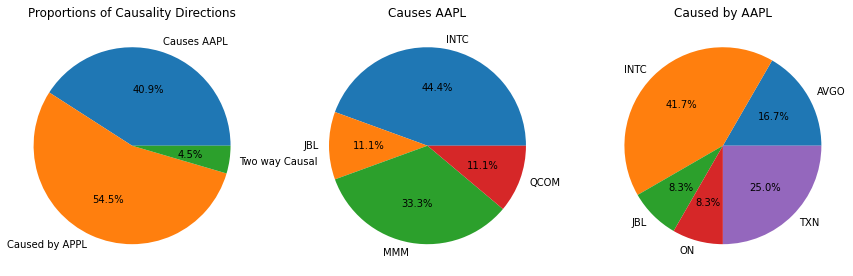

In [25]:
caused_by_aapl = granger_causal.loc[(granger_causal['Caused by APPL p-value']<=0.05) & (granger_causal['Causes APPL p-value']>=0.05 ) ]
causes_aapl= granger_causal.loc[(granger_causal['Causes APPL p-value']<=0.05)&(granger_causal['Caused by APPL p-value']>0.05)]


fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,6))

# Plot the proportion of causality direction
labels1 = ['Causes AAPL', 'Caused by APPL', 'Two way Causal']
sizes1 = [len(causes_aapl), len(caused_by_aapl), len(granger_causal)-(len(causes_aapl)+len(caused_by_aapl))]

ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%')
ax1.set(title='Proportions of Causality Directions')


# Plot the proportion of times a company 'causes' AAPL
labels2 = causes_aapl.groupby('Ticker').count().index.values
sizes2 = causes_aapl.groupby('Ticker')['Causes APPL p-value'].count().values

ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%')
ax2.set(title='Causes AAPL')


# Plot the proportion of times a AAPL 'causes' a company
labels3 = caused_by_aapl.groupby('Ticker').count().index.values
sizes3 = caused_by_aapl.groupby('Ticker')['Causes APPL p-value'].count().values

ax3.pie(sizes3, labels=labels3, autopct='%1.1f%%')
ax3.set(title='Caused by AAPL')


plt.show()

Upon examination, it is evident that the daily returns of the supply chain exhibit Granger causality to Apple's daily returns, constituting 40% of the identified causal relationships. Conversely, Apple's returns demonstrate Granger causality for over 50% of the observed instances. Furthermore, it is noteworthy that Intel (INTC) represents the most substantial proportion of companies exhibiting causality, both as a causal entity and as a company influenced by Apple. <br>
 &nbsp;&nbsp;&nbsp;&nbsp;  Furthermore, the prominence of Intel (INTC) in both causal and influenced relationships underscores its pivotal role within the examined context. This points towards Intel's potential impact on Apple and its susceptibility to changes in Apple's performance.

## Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;  In conclusion, the intricate web of relationships within Apple's supply chain presents a challenging landscape for financial analysis. Recognizing the limitations of traditional correlation measures due to the non-stationary nature of time-series data, this study delves into the concept of cointegration. The project specifically investigates cointegration and Granger causality among Apple (AAPL) stock and eight major American companies integral to the Apple supply chain. The companies include 3M (MMM), Broadcom (AVGO), Qualcomm (QCOM), Intel (INTC), Jabil Circuits (JBL), ON Semiconductor (ON), Micron (MU), and Texas Instruments (TXN). Through rigorous analysis, the study reveals statistically significant cointegration during certain time intervals, shedding light on underlying structural relationships. <br>
&nbsp;&nbsp;&nbsp;&nbsp;  Moreover, the presence of Granger causality suggests a directional influence between the variables, with implications for predictive modeling. The application of Grainger causality in the context of stochastic processes provides insights into the predictive power of one variable over another. In this project, the focus is on AAPL's ability to predict fluctuations in the stock prices of the companies within its supply chain. By adopting a robust methodology centered around cointegration and Grainger causality, the research provides a more nuanced perspective on the dynamics between Apple and its key suppliers. These findings not only enhance our theoretical understanding of financial relationships but also have practical implications for those engaged in investment decision-making within the technology sector.